# Data Exploration

Explore the multiple datasets and check different data assumptions.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2000-data:-output-and-feature-distances" data-toc-modified-id="2000-data:-output-and-feature-distances-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2000 data: output and feature distances</a></span><ul class="toc-item"><li><span><a href="#Check-the-distribution-of-each-feature" data-toc-modified-id="Check-the-distribution-of-each-feature-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Check the distribution of each feature</a></span></li><li><span><a href="#Standardize-the-numerical-data" data-toc-modified-id="Standardize-the-numerical-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Standardize the numerical data</a></span></li><li><span><a href="#Euclidean-distances-of-random-pairs-of-feature-vectors" data-toc-modified-id="Euclidean-distances-of-random-pairs-of-feature-vectors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Euclidean distances of random pairs of feature vectors</a></span></li><li><span><a href="#Calorie-distribution" data-toc-modified-id="Calorie-distribution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Calorie distribution</a></span></li><li><span><a href="#Feature-similarity-and-yield" data-toc-modified-id="Feature-similarity-and-yield-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Feature similarity and yield</a></span></li><li><span><a href="#Back-with-the-soil-indexes" data-toc-modified-id="Back-with-the-soil-indexes-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Back with the soil indexes</a></span></li></ul></li><li><span><a href="#2000-data:-feature-similarity-clusters" data-toc-modified-id="2000-data:-feature-similarity-clusters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2000 data: feature similarity clusters</a></span><ul class="toc-item"><li><span><a href="#Clustering-algorithm-selection-and-tunning" data-toc-modified-id="Clustering-algorithm-selection-and-tunning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Clustering algorithm selection and tunning</a></span></li><li><span><a href="#Visualize-the-clusters" data-toc-modified-id="Visualize-the-clusters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualize the clusters</a></span></li></ul></li><li><span><a href="#Cluster-the-2050-points-based-on-the-2000-clusters" data-toc-modified-id="Cluster-the-2050-points-based-on-the-2000-clusters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cluster the 2050 points based on the 2000 clusters</a></span><ul class="toc-item"><li><span><a href="#Create-the-clusters" data-toc-modified-id="Create-the-clusters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create the clusters</a></span></li><li><span><a href="#Add-the-convex-hull-(min-max)" data-toc-modified-id="Add-the-convex-hull-(min-max)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Add the convex-hull (min-max)</a></span><ul class="toc-item"><li><span><a href="#Show-points-outside-the-convex-hull-on-clusters-map" data-toc-modified-id="Show-points-outside-the-convex-hull-on-clusters-map-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Show points outside the convex hull on clusters map</a></span></li></ul></li><li><span><a href="#Visualize-the-clusters-and-the-convex-hulls" data-toc-modified-id="Visualize-the-clusters-and-the-convex-hulls-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualize the clusters and the convex-hulls</a></span></li></ul></li><li><span><a href="#Transform-the-GDP-to-create-multiple-bins-with-world-bank-data" data-toc-modified-id="Transform-the-GDP-to-create-multiple-bins-with-world-bank-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transform the GDP to create multiple bins with world bank data</a></span></li><li><span><a href="#Transform-gdp-with-statistical-sepration" data-toc-modified-id="Transform-gdp-with-statistical-sepration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Transform gdp with statistical sepration</a></span></li><li><span><a href="#Re-run-everything-with-new-categorical-GDP" data-toc-modified-id="Re-run-everything-with-new-categorical-GDP-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Re run everything with new categorical GDP</a></span><ul class="toc-item"><li><span><a href="#Computing" data-toc-modified-id="Computing-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Computing</a></span></li><li><span><a href="#Convex-hull" data-toc-modified-id="Convex-hull-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Convex hull</a></span></li><li><span><a href="#Explain-the-clusters" data-toc-modified-id="Explain-the-clusters-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Explain the clusters</a></span></li></ul></li></ul></div>

**Import useful librairies and set constants**

In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

import scipy.sparse.linalg

from matplotlib import colors, patches
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

import seaborn as sns

from collections import OrderedDict

import os, sys

import bisect

In [2]:
plt.rcParams['axes.titlepad'] = 20 

In [3]:
# Value to change to get correct paths
data_path = 'data/'

In [61]:
inputs_path = data_path + 'inputs/'
intermediate_path = data_path + 'intermediate/'
#output_path = data_path + 'outputs/with_irrig/'

#data_2000_no_irrig_path = intermediate_path + 'Base/original/'
data_2000_path = intermediate_path + 'Baseline_df_iterations/with_irrig/'

#data_2050_no_irrig_path = intermediate_path + 'Future_dfs/All_change/'
data_2050_path = intermediate_path + 'Future_dfs/All_change+irrig/'

data_2050_gdp_cont_path = data_2050_path + 'gdp_cont/original/'
data_2050_gdp_income_path = data_2050_path + 'gdp_cat_income/original/'
data_2050_gdp_stat_path = data_2050_path + 'gdp_cat_stat/original/'

data_2050_gdp_cont_clustered_path = data_2050_path + 'gdp_cont/clustered/'
data_2050_gdp_income_clustered_path = data_2050_path + 'gdp_cat_income/clustered/'
data_2050_gdp_stat_clustered_path = data_2050_path + 'gdp_cat_stat/clustered/'


figure_path = 'figures/with_irrig/'
dist_figures_path = figure_path + 'distributions/'
agg_assumption_fig_path = figure_path + 'agg_assumption/'
cluster_fig_path = figure_path + 'clusters/'
convex_hull_fig_path = figure_path + 'convex_hull/'

In [11]:
#.apply(lambda val: np.exp(val))

## 2000 data: output and feature distances

The goal of this part is to check the assumption that similar land attributes (similar input feature vectors) yield to a similar output (calories per hectare).

**Load data**

In [5]:
original_df = pd.read_csv(data_2000_path + 'baseline_df.csv', index_col='pixel_id', na_values=[-9999])
# All NaN column
original_df = original_df.drop(columns=['fertl_c4per'])
original_df_inputs = original_df.drop(['log_calories_per_ha'], axis=1)
original_df_inputs.head()

nutrient_availability_index  oxygen_availability_index  \
pixel_id                                                           
1272549                           3.0                        4.0   
1276867                           3.0                        4.0   
1276868                           3.0                        3.0   
1298466                           3.0                        4.0   
1298467                           3.0                        3.0   

          workability_index  protected_areas_index  nutrient_retention_index  \
pixel_id                                                                       
1272549                 1.0                      2                       2.0   
1276867                 1.0                      0                       2.0   
1276868                 1.0                      0                       3.0   
1298466                 1.0                      2                       2.0   
1298467                 1.0                      0                       2.0   

          toxicity_index  excess_salts_index  rooting_conditions_index  \
pixel_id                                                                 
1272549              1.0                 1.0                       1.0   
1276867              1.0                 1.0                       1.0   
1276868              1.0                 1.0                       1.0   
1298466              1.0                 1.0                       1.0   
1298467              1.0                 1.0                       1.0   

             slope  Annual Mean Temperature  ...  fertl_c3nfx  fertl_c3per  \
pixel_id                                     ...                             
1272549   0.003900                 1.227833  ...    16.089557    20.130279   
1276867   0.007459                 1.468417  ...     0.000760     0.000951   
1276868   0.006798                 1.451334  ...     0.000760     0.000951   
1298466   0.007925                 2.197958  ...    48.268002    60.389999   
1298467   0.007998                 2.069208  ...    48.268002    60.389999   

          fertl_c4ann  log_altitude  log_GDP_pc  irrig_c3ann  irrig_c3per  \
pixel_id                                                                    
1272549           0.0      4.290459    3.456326          0.0          0.0   
1276867           0.0      3.891820    3.456326          0.0          0.0   
1276868           0.0      3.871201    3.456326          0.0          0.0   
1298466           0.0      2.944439    3.456326          0.0          0.0   
1298467           0.0      3.332205    3.456326          0.0          0.0   

          irrig_c3nfx  irrig_c4ann  irrig_c4per  
pixel_id                                         
1272549           0.0          0.0          0.0  
1276867           0.0          0.0          0.0  
1276868           0.0          0.0          0.0  
1298466           0.0          0.0          0.0  
1298467           0.0          0.0          0.0  

[5 rows x 31 columns]

In [6]:
len(original_df)

906797

In [7]:
#input_col = original_df_inputs.columns
input_col = ['nutrient_availability_index', 'oxygen_availability_index',
       'workability_index', 'protected_areas_index',
       'nutrient_retention_index', 'toxicity_index', 'excess_salts_index',
       'rooting_conditions_index', 'slope', 'Annual Mean Temperature',
       'Mean Diurnal Range', 'Isothermality', 'Temperature Seasonality',
       'Max Temperature of Warmest Month', 'Min Temperature of Coldest Month',
       'Temperature Annual Range', 'Annual Precipitation',
       'Precipitation of Wettest Month', 'Precipitation of Driest Month',
       'Precipitation Seasonality', 'fertl_c3ann', 'fertl_c3nfx',
       'fertl_c3per', 'fertl_c4ann', 'log_altitude', 'log_GDP_pc',
       'irrig_c3ann', 'irrig_c3per', 'irrig_c3nfx', 'irrig_c4ann',
       'irrig_c4per']
input_col

['nutrient_availability_index',
 'oxygen_availability_index',
 'workability_index',
 'protected_areas_index',
 'nutrient_retention_index',
 'toxicity_index',
 'excess_salts_index',
 'rooting_conditions_index',
 'slope',
 'Annual Mean Temperature',
 'Mean Diurnal Range',
 'Isothermality',
 'Temperature Seasonality',
 'Max Temperature of Warmest Month',
 'Min Temperature of Coldest Month',
 'Temperature Annual Range',
 'Annual Precipitation',
 'Precipitation of Wettest Month',
 'Precipitation of Driest Month',
 'Precipitation Seasonality',
 'fertl_c3ann',
 'fertl_c3nfx',
 'fertl_c3per',
 'fertl_c4ann',
 'log_altitude',
 'log_GDP_pc',
 'irrig_c3ann',
 'irrig_c3per',
 'irrig_c3nfx',
 'irrig_c4ann',
 'irrig_c4per']

### Check the distribution of each feature

First, we try to see if we can prove our assumption with only the non-index features, thus we remove all the indexes columns and the irrigation. We will add them back after to see if the results are still consistent.

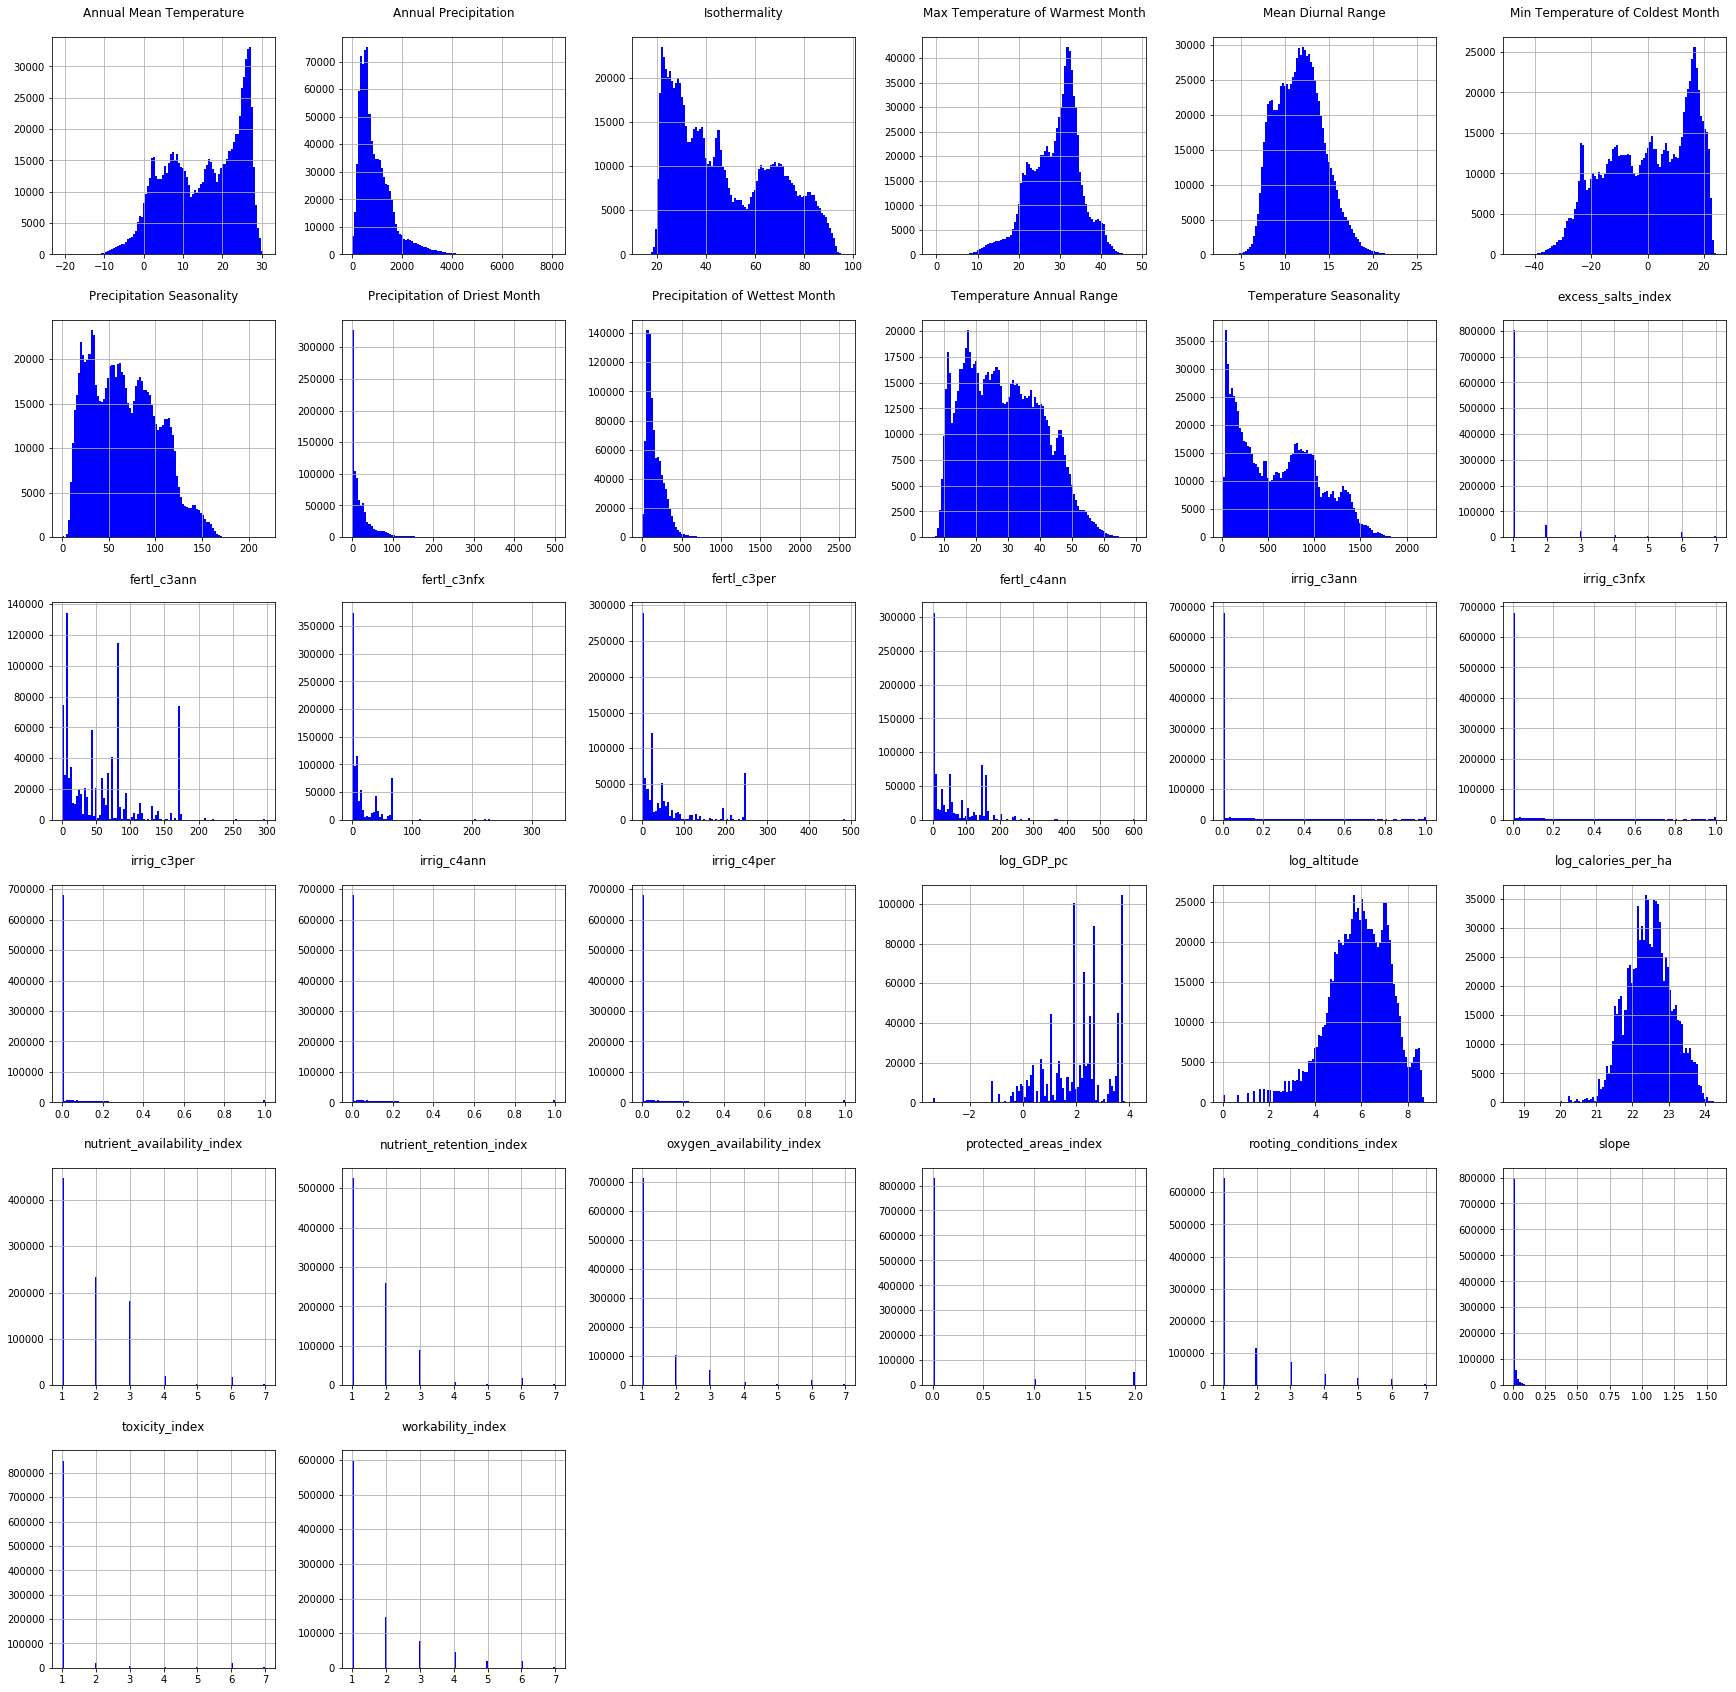

In [37]:
original_df.hist(bins=100, figsize=(30, 30), color='b');
plt.savefig(dist_figures_path + 'original_feature_distribution.png', dpi=500)

In [8]:
numerical_col = ['slope', 'Annual Mean Temperature',
               'Mean Diurnal Range', 'Isothermality', 'Temperature Seasonality',
               'Max Temperature of Warmest Month', 'Min Temperature of Coldest Month',
               'Temperature Annual Range', 'Annual Precipitation',
               'Precipitation of Wettest Month', 'Precipitation of Driest Month',
               'Precipitation Seasonality', 'fertl_c3ann', 'fertl_c3nfx',
               'fertl_c3per', 'fertl_c4ann', 'log_altitude', 'log_GDP_pc', 'irrig_c3ann', 
               'irrig_c3per', 'irrig_c3nfx', 'irrig_c4ann', 'irrig_c4per']

non_numerical_col = ['nutrient_availability_index', 'oxygen_availability_index',
               'workability_index', 'protected_areas_index', 'nutrient_retention_index', 
               'toxicity_index', 'excess_salts_index', 'rooting_conditions_index']

In [9]:
original_df_inputs_light = original_df_inputs.drop(columns=non_numerical_col)

In [10]:
original_df_inputs_light.describe()

slope  Annual Mean Temperature  Mean Diurnal Range  \
count  906797.000000            906797.000000       906797.000000   
mean        0.008902                15.201403           11.718551   
std         0.032542                 9.470299            2.716190   
min         0.000044               -20.760042            2.904917   
25%         0.000896                 7.176333            9.613250   
50%         0.002709                16.471500           11.662083   
75%         0.007158                24.148083           13.532250   
max         1.570796                30.851583           26.013333   

       Isothermality  Temperature Seasonality  \
count  906797.000000            906797.000000   
mean       47.809857               615.402770   
std        20.533154               431.042739   
min        14.046306                 9.102072   
25%        29.350795               212.179756   
50%        43.269898               582.295541   
75%        65.901811               939.133917   
max        96.696486              2205.612766   

       Max Temperature of Warmest Month  Min Temperature of Coldest Month  \
count                     906797.000000                     906797.000000   
mean                          28.908898                          0.037127   
std                            6.161244                         14.897434   
min                           -0.944000                        -47.716999   
25%                           24.701000                        -12.032001   
50%                           29.913000                          1.490000   
75%                           32.987999                         13.925000   
max                           48.437000                         24.200001   

       Temperature Annual Range  Annual Precipitation  \
count             906797.000000         906797.000000   
mean                  28.871772            943.094804   
std                   11.973373            701.022585   
min                    6.498999              0.000000   
25%                   18.657997            453.000000   
50%                   27.784000            726.000000   
75%                   38.127000           1253.000000   
max                   69.941999           8122.000000   

       Precipitation of Wettest Month  ...    fertl_c3nfx    fertl_c3per  \
count                   906797.000000  ...  906770.000000  906770.000000   
mean                       163.736823  ...      16.056328      48.153067   
std                        122.580902  ...      23.960472      71.602349   
min                          0.000000  ...       0.000000       0.000000   
25%                         78.000000  ...       1.361000       0.805000   
50%                        127.000000  ...       5.111000      20.643000   
75%                        225.000000  ...      18.271000      53.161999   
max                       2578.000000  ...     338.792999     487.140991   

         fertl_c4ann   log_altitude     log_GDP_pc    irrig_c3ann  \
count  906770.000000  906797.000000  906797.000000  906770.000000   
mean       59.609234       5.893325       2.046978       0.084931   
std        66.746786       1.339263       1.204909       0.208070   
min         0.000000       0.000000      -3.388525       0.000000   
25%         4.812000       5.075174       1.286502       0.000000   
50%        32.762001       5.976351       2.311817       0.000000   
75%       115.182656       6.897705       2.664637       0.011275   
max       604.789001       8.775395       4.230240       1.000000   

         irrig_c3per    irrig_c3nfx    irrig_c4ann    irrig_c4per  
count  906770.000000  906770.000000  906770.000000  906770.000000  
mean        0.084931       0.084931       0.084931       0.084931  
std         0.208070       0.208070       0.208070       0.208070  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0

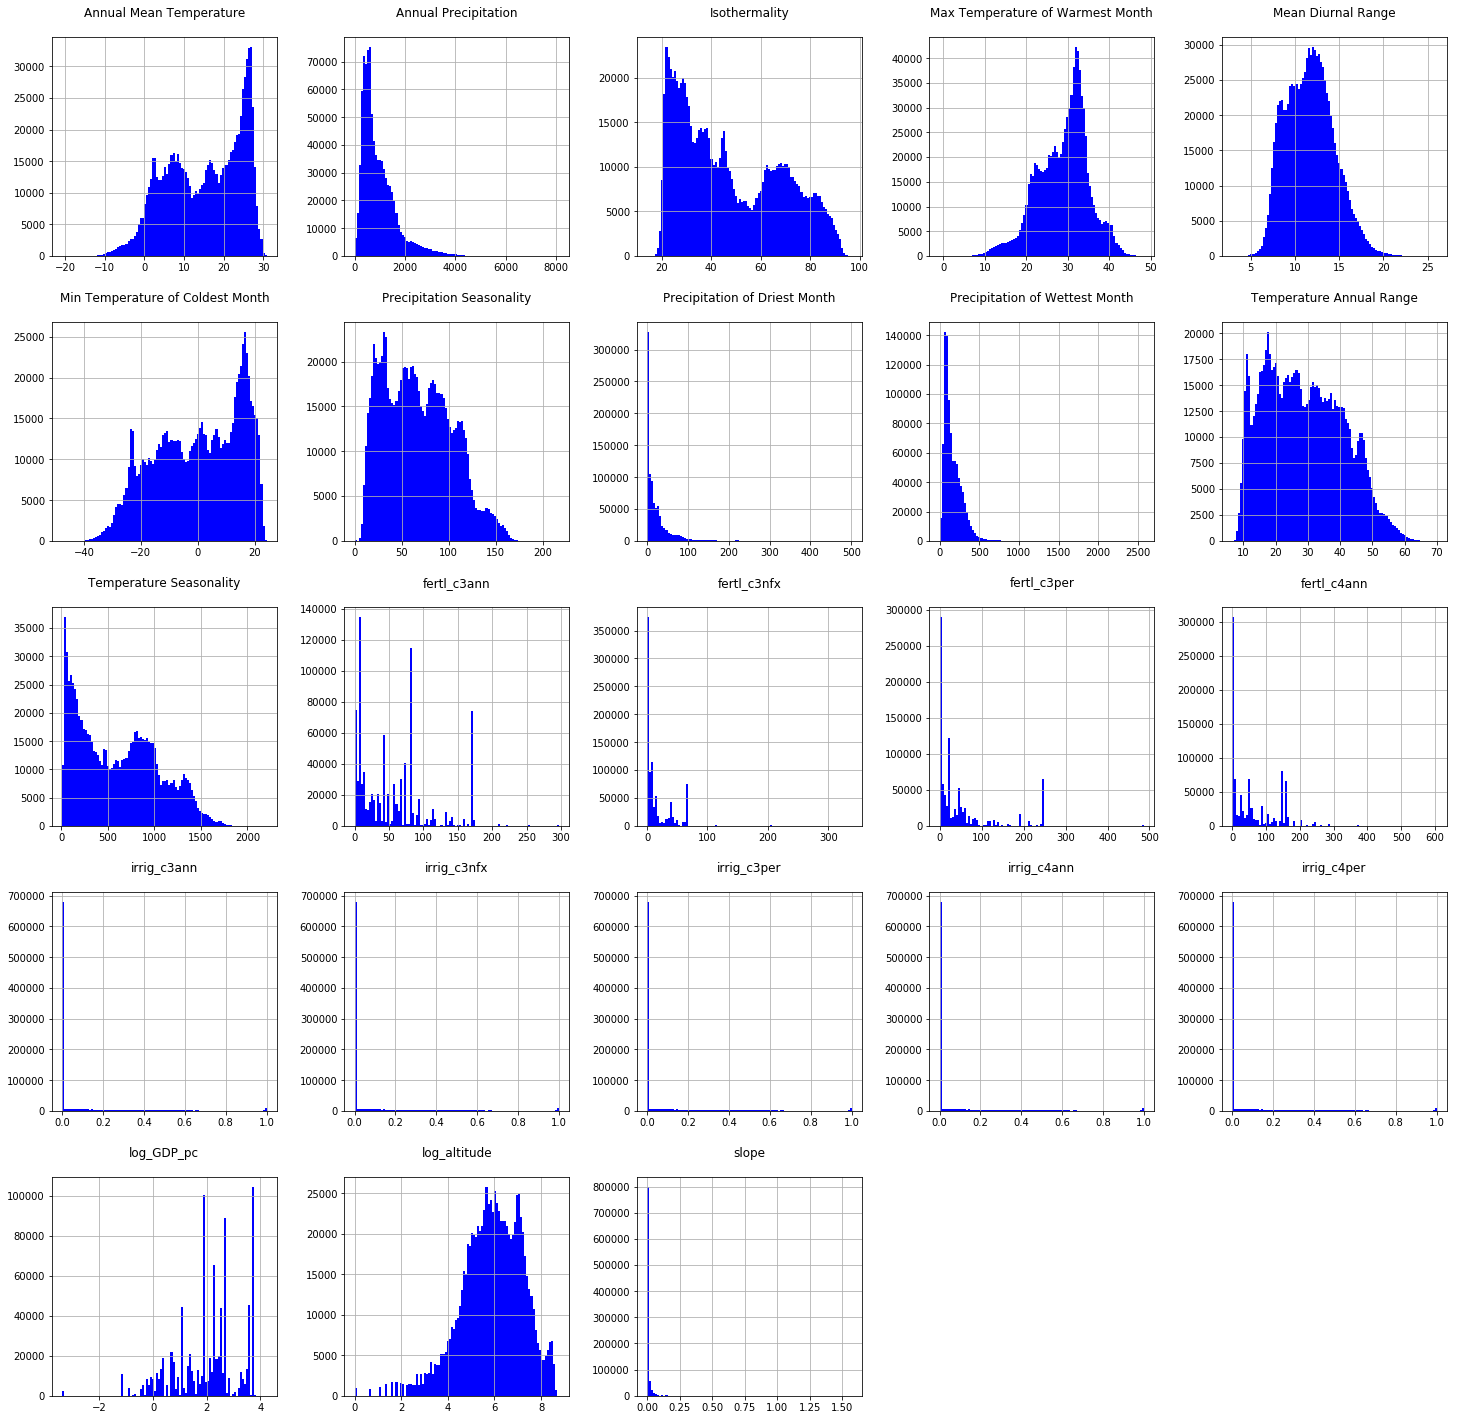

In [41]:
original_df_inputs_light.hist(bins=100, figsize=(25, 25), color='b');
plt.savefig(dist_figures_path + 'numerical_col_distribution.png', dpi=500)

### Standardize the numerical data

In [12]:
scaler = StandardScaler().fit(original_df_inputs_light.dropna().values)
scaled_features = scaler.transform(original_df_inputs_light.dropna().values)

normalized_df_inputs_light = pd.DataFrame(scaled_features, index=original_df_inputs_light.dropna().index, columns=original_df_inputs_light.columns)
normalized_df_light = normalized_df_inputs_light.join(original_df['log_calories_per_ha'])
normalized_df_light.head()

slope  Annual Mean Temperature  Mean Diurnal Range  \
pixel_id                                                          
1272549  -0.153686                -1.475497           -1.165186   
1276867  -0.044311                -1.450093           -1.237776   
1276868  -0.064612                -1.451896           -1.224768   
1298466  -0.029986                -1.373057           -1.550443   
1298467  -0.027755                -1.386652           -1.462573   

          Isothermality  Temperature Seasonality  \
pixel_id                                           
1272549       -1.144281                 0.809341   
1276867       -1.168411                 0.799235   
1276868       -1.167575                 0.812007   
1298466       -1.245204                 0.779111   
1298467       -1.218038                 0.766754   

          Max Temperature of Warmest Month  Min Temperature of Coldest Month  \
pixel_id                                                                       
1272549                          -1.712443                         -1.131726   
1276867                          -1.697998                         -1.119308   
1276868                          -1.682255                         -1.121053   
1298466                          -1.614412                         -0.995392   
1298467                          -1.639893                         -1.020766   

          Temperature Annual Range  Annual Precipitation  \
pixel_id                                                   
1272549                   0.526905             -0.529328   
1276867                   0.518887             -0.542167   
1276868                   0.529160             -0.552153   
1298466                   0.407722             -0.629187   
1298467                   0.426180             -0.619201   

          Precipitation of Wettest Month  ...  fertl_c3per  fertl_c4ann  \
pixel_id                                  ...                             
1272549                        -0.764668  ...    -0.391367    -0.893066   
1276867                        -0.789142  ...    -0.672494    -0.893066   
1276868                        -0.780984  ...    -0.672494    -0.893066   
1298466                        -0.797301  ...     0.170901    -0.893066   
1298467                        -0.789142  ...     0.170901    -0.893066   

          log_altitude  log_GDP_pc  irrig_c3ann  irrig_c3per  irrig_c3nfx  \
pixel_id                                                                    
1272549      -1.196992    1.169662    -0.408186    -0.408186    -0.408186   
1276867      -1.494671    1.169662    -0.408186    -0.408186    -0.408186   
1276868      -1.510069    1.169662    -0.408186    -0.408186    -0.408186   
1298466      -2.202117    1.169662    -0.408186    -0.408186    -0.408186   
1298467      -1.912558    1.169662    -0.408186    -0.408186    -0.408186   

          irrig_c4ann  irrig_c4per  log_calories_per_ha  
pixel_id                                                 
1272549     -0.408186    -0.408186            22.911327  
1276867     -0.408186    -0.408186            22.911327  
1276868     -0.408186    -0.408186            22.911327  
1298466     -0.408186    -0.408186            22.911327  
1298467     -0.408186    -0.408186            22.911327  

[5 rows x 24 columns]

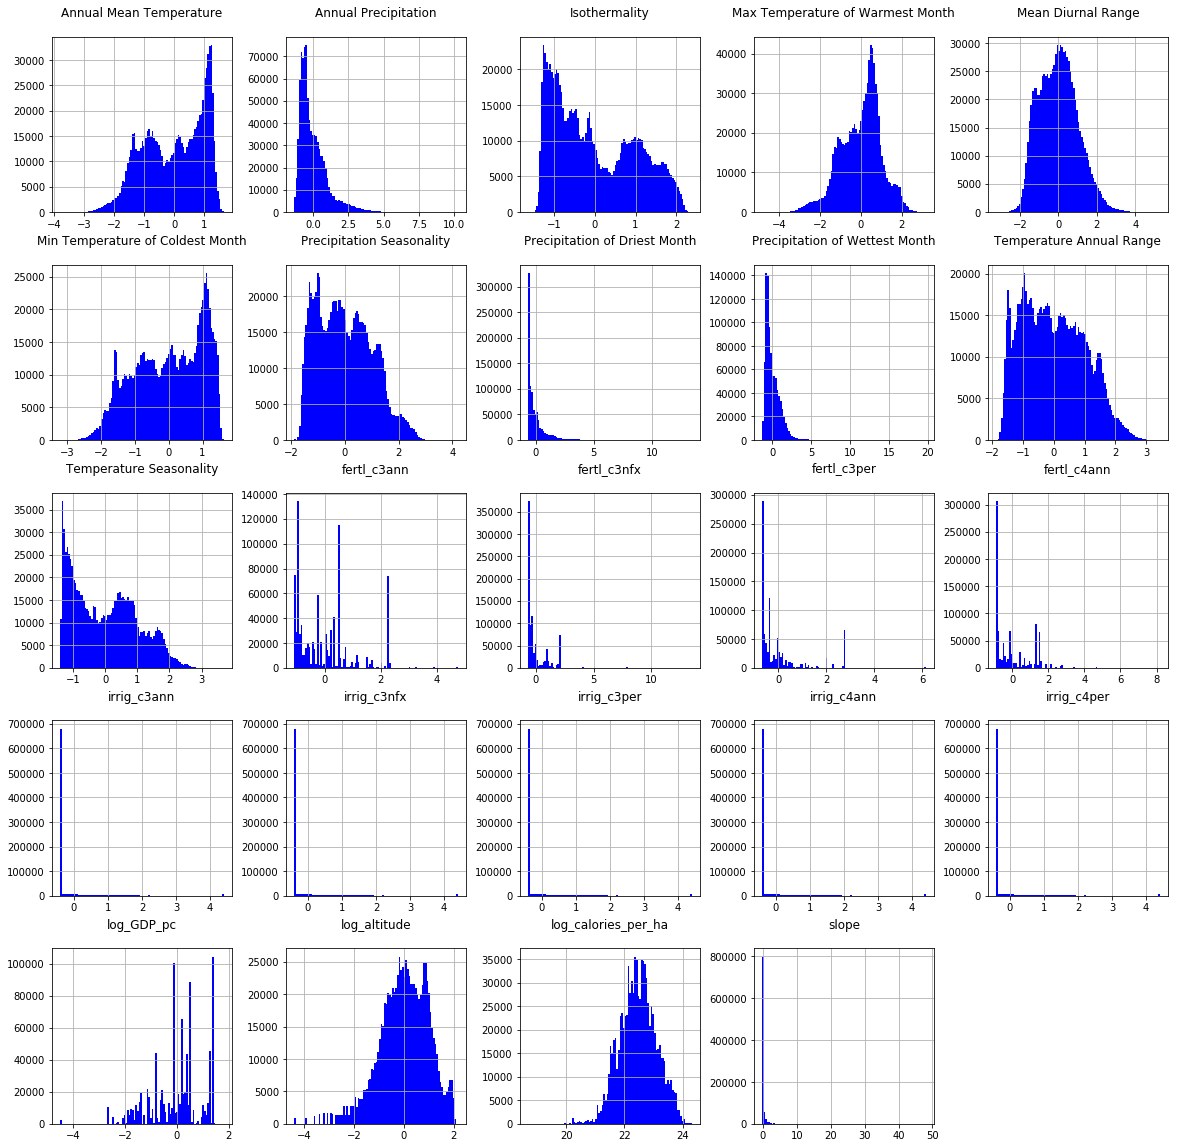

In [13]:
normalized_df_light.hist(bins=100, figsize=(20, 20), color='b');

In [14]:
normalized_df_light.describe()

slope  Annual Mean Temperature  Mean Diurnal Range  \
count  9.067700e+05             9.067700e+05        9.067700e+05   
mean  -5.666977e-17            -1.023065e-16        1.355060e-15   
std    1.000001e+00             1.000001e+00        1.000001e+00   
min   -2.721793e-01            -3.797289e+00       -3.244934e+00   
25%   -2.459793e-01            -8.473817e-01       -7.750512e-01   
50%   -1.902700e-01             1.341088e-01       -2.076774e-02   
75%   -5.355982e-02             9.447050e-01        6.677363e-01   
max    4.799680e+01             1.652600e+00        5.262836e+00   

       Isothermality  Temperature Seasonality  \
count   9.067700e+05             9.067700e+05   
mean   -8.811398e-16            -3.540607e-16   
std     1.000001e+00             1.000001e+00   
min    -1.644334e+00            -1.406635e+00   
25%    -8.989681e-01            -9.354683e-01   
50%    -2.211101e-01            -7.675481e-02   
75%     8.810618e-01             7.510481e-01   
max     2.380944e+00             3.689209e+00   

       Max Temperature of Warmest Month  Min Temperature of Coldest Month  \
count                      9.067700e+05                      9.067700e+05   
mean                      -4.994964e-16                     -1.359072e-16   
std                        1.000001e+00                      1.000001e+00   
min                       -4.845240e+00                     -3.205541e+00   
25%                       -6.829474e-01                     -8.101892e-01   
50%                        1.628202e-01                      9.749903e-02   
75%                        6.620678e-01                      9.322204e-01   
max                        3.169506e+00                      1.622015e+00   

       Temperature Annual Range  Annual Precipitation  \
count              9.067700e+05          9.067700e+05   
mean              -1.124368e-15          8.939281e-17   
std                1.000001e+00          1.000001e+00   
min               -1.868620e+00         -1.345316e+00   
25%               -8.530984e-01         -6.990879e-01   
50%               -9.081013e-02         -3.096390e-01   
75%                7.729555e-01          4.421545e-01   
max                3.430149e+00          1.024115e+01   

       Precipitation of Wettest Month  ...   fertl_c3per   fertl_c4ann  \
count                    9.067700e+05  ...  9.067700e+05  9.067700e+05   
mean                     2.357061e-17  ...  2.507512e-17  2.331986e-17   
std                      1.000001e+00  ...  1.000001e+00  1.000001e+00   
min                     -1.335739e+00  ... -6.725072e-01 -8.930657e-01   
25%                     -6.994027e-01  ... -6.612645e-01 -8.209723e-01   
50%                     -2.996531e-01  ... -3.842064e-01 -4.022253e-01   
75%                      4.998460e-01  ...  6.995489e-02  8.326012e-01   
max                      1.969598e+01  ...  6.130919e+00  8.167885e+00   

       log_altitude    log_GDP_pc   irrig_c3ann   irrig_c3per   irrig_c3nfx  \
count  9.067700e+05  9.067700e+05  9.067700e+05  9.067700e+05  9.067700e+05   
mean   7.788333e-16 -7.863558e-16 -4.052140e-16 -4.052140e-16 -4.052140e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -4.400842e+00 -4.511064e+00 -4.081860e-01 -4.081860e-01 -4.081860e-01   
25%   -6.110163e-01 -6.311327e-01 -4.081860e-01 -4.081860e-01 -4.081860e-01   
50%    6.192686e-02  2.198040e-01 -4.081860e-01 -4.081860e-01 -4.081860e-01   
75%    7.499370e-01  5.126189e-01 -3.539992e-01 -3.539992e-01 -3.539992e-01   
max    2.152079e+00  1.811955e+00  4.397889e+00  4.397889e+00  4.397889e+00   

        irrig_c4ann   irrig_c4per  log_calories_per_ha  
count  9.067700e+05  9.067700e+05        906770.000000  
mean  -4.052140e-16 -4.052140e-16            22.467157  
std    1.000001e+00  1.000001e+00             0.631209  
min   -4.081860e-01 -4.081860e-01            18.687235  
25%   -4.081860e-01 -4.081860e-01            22.037706  
50%   -4.081860e-01 -4.081860e

### Euclidean distances of random pairs of feature vectors

In [46]:
diff = (np.array(shuffle(normalized_df_inputs_light)) - np.array(shuffle(normalized_df_inputs_light)))
distances = np.linalg.norm(diff, axis=1)
print('Average Eucledian distance: {:.4f}'.format(distances.mean()))
print('Std of Eucledian distance: {:.4f}'.format(np.std(distances)))

Average Eucledian distance: 6.2529
Std of Eucledian distance: 2.6285


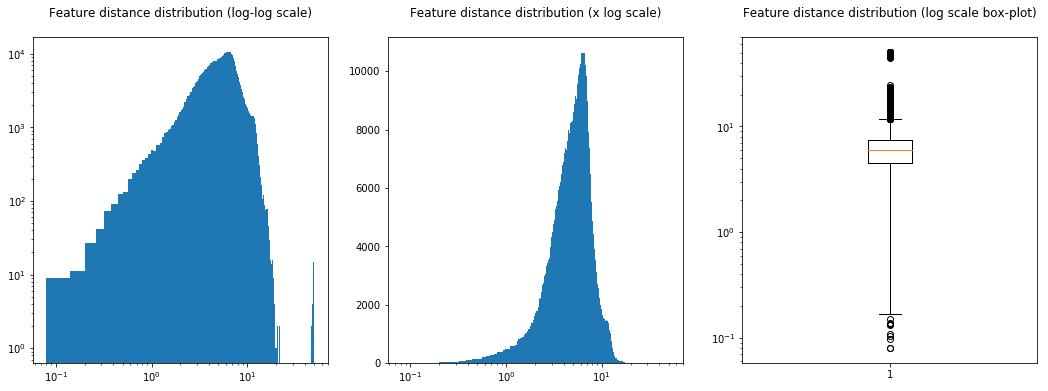

In [47]:
# distance distribution
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(distances, bins='auto')
plt.xscale('log')
plt.yscale('log')
plt.title('Feature distance distribution (log-log scale)')

plt.subplot(1, 3, 2)
plt.hist(distances, bins='auto')
plt.xscale('log')
plt.title('Feature distance distribution (x log scale)')

plt.subplot(1, 3, 3)
plt.boxplot(distances)
plt.yscale('log')
plt.title('Feature distance distribution (log scale box-plot)');

### Calorie distribution

In [16]:
# find average cal per hect diff
diff_cal_per_ha = np.subtract(shuffle(normalized_df_light['log_calories_per_ha'].apply(lambda val: np.exp(val))), shuffle(normalized_df_light['log_calories_per_ha'].apply(lambda val: np.exp(val)))).abs()
print('Mean calories_per_ha difference between two random points: {:,.2f}'.format(diff_cal_per_ha.mean()))

Mean calories_per_ha difference between two random points: 4,730,841,064.99


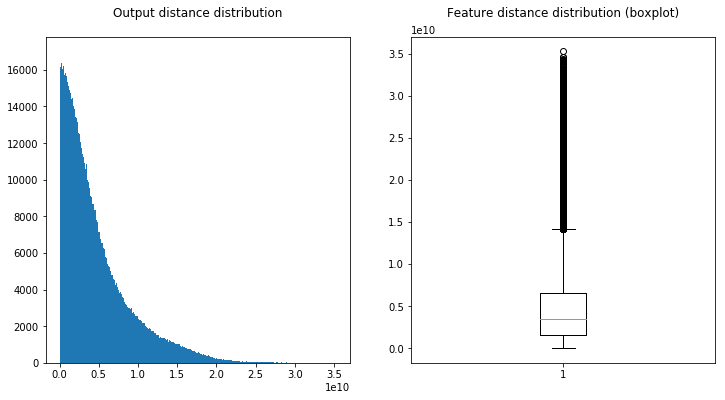

In [17]:
# log_cal_per_ha difference distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(diff_cal_per_ha, bins='auto')
plt.title('Output distance distribution')

plt.subplot(1, 2, 2)
plt.boxplot(diff_cal_per_ha)
plt.title('Feature distance distribution (boxplot)');

### Feature similarity and yield

In [33]:
# Compute feature and associated log_cal_per_ha distance of random samples
# size represents the number of points to sample: we will have size^2 pairs of points
def compute_trend(size, dataframe):
    df = dataframe.copy()
    df['calories_per_ha'] = df['log_calories_per_ha'].apply(lambda val: np.exp(val))
    distances = list()
    cal_diffs = list()
    df_inp = df.drop(['log_calories_per_ha', 'calories_per_ha'], axis=1)
    for index, row in df_inp.sample(size).iterrows():
        for index2, row2 in df_inp.sample(size).iterrows():
            if(index != index2):
                diff = row - row2
                # round distances to 1 decimal to create bins of 0.1
                dist = round(np.linalg.norm(diff), 1)
                cal_diff = abs(df['calories_per_ha'].loc[index] - df['calories_per_ha'].loc[index2])
                distances.append(dist)
                cal_diffs.append(cal_diff)
    per_similarity = pd.DataFrame(np.column_stack([distances, cal_diffs]), columns=['distance', 'cal_diff'])
    return per_similarity

In [ ]:
# Long to run
similarity = compute_trend(2000, normalized_df_light)

In [34]:
# Used to plot the result of the compute_trend() function
# The threshold represents the maximun distance that we wish to show (we want to sudy only similar points)
def plot_trend(per_similarity, threshold=4.5):
    plt.figure(figsize=(12, 8))
    
    ax1 = plt.subplot(1, 2, 1)
    num_points = per_similarity.groupby('distance').count().reset_index()
    num_points = num_points[num_points['distance'] < threshold]
    ax1.bar(num_points['distance'], num_points['cal_diff'])
    ax1.set_xlabel('Feature distance')
    ax1.set_ylabel('Number of samples')
    ax1.set_title('Samples distance distribution')
    
    ax2 = plt.subplot(1, 2, 2)
    sns.lineplot(x='distance', y='cal_diff', data=per_similarity[per_similarity['distance'] < threshold], ax=ax2)
    ax2.set_xlabel('Feature distance')
    ax2.set_ylabel('Mean calories_per_ha difference')
    ax2.set_title('Output distance in terms of feature distance with 95% CI')
    
    plt.savefig(agg_assumption_fig_path + 'similarity_numerical_features.png', dpi=500)

In [ ]:
plot_trend(similarity, 12)

We can observe that more similar points have a more similar output, the difference of output between similar inputs is way smaller than the one of random input features. For similar outputs, the mean calorie difference sits below the overall average.

### Back with the soil indexes

In [19]:
normalized_df_input = normalized_df_inputs_light.join(original_df_inputs[non_numerical_col])
normalized_df_input[non_numerical_col].describe()

nutrient_availability_index  oxygen_availability_index  \
count                906770.000000              906770.000000   
mean                      1.857829                   1.413832   
std                       1.092990                   1.006800   
min                       1.000000                   1.000000   
25%                       1.000000                   1.000000   
50%                       2.000000                   1.000000   
75%                       2.000000                   1.000000   
max                       7.000000                   7.000000   

       workability_index  protected_areas_index  nutrient_retention_index  \
count      906770.000000          906770.000000             906770.000000   
mean            1.685237               0.141221                  1.642262   
std             1.200431               0.484377                  1.007920   
min             1.000000               0.000000                  1.000000   
25%             1.000000               0.000000                  1.000000   
50%             1.000000               0.000000                  1.000000   
75%             2.000000               0.000000                  2.000000   
max             7.000000               2.000000                  7.000000   

       toxicity_index  excess_salts_index  rooting_conditions_index  
count   906770.000000       906770.000000             906770.000000  
mean         1.183022            1.268870                  1.613947  
std          0.847649            0.927699                  1.191477  
min          1.000000            1.000000                  1.000000  
25%          1.000000            1.000000                  1.000000  
50%          1.000000            1.000000                  1.000000  
75%          1.000000            1.000000                  2.000000  
max          7.000000            7.000000                  7.000000

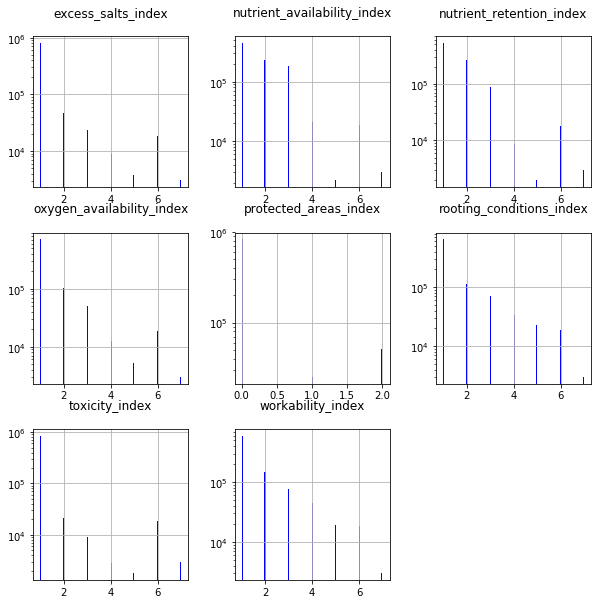

In [20]:
normalized_df_input[non_numerical_col].hist(bins=100, figsize=(10, 10), log=True, color='b');

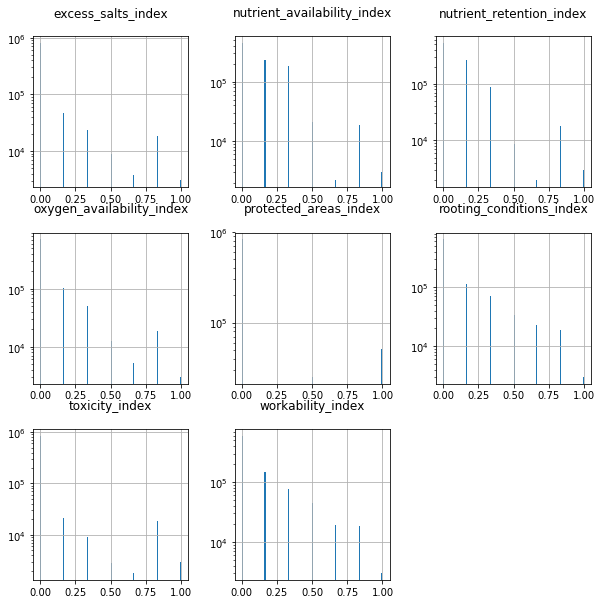

In [21]:
# Normalize the soil indexes
for col in non_numerical_col:
    normalized_df_input[col] = normalized_df_input[col] - normalized_df_input[col].min()
    normalized_df_input[col] = normalized_df_input[col] / normalized_df_input[col].max()
normalized_df_input[non_numerical_col].hist(bins=100, figsize=(10, 10), log=True);

In [35]:
normalized_df = normalized_df_input.join(normalized_df_light['log_calories_per_ha'])

sub_df = normalized_df.dropna()
sub_df_input = normalized_df_input.dropna()

In [36]:
diff = np.array(shuffle(sub_df_input)) - np.array(shuffle(sub_df_input))
distances = np.linalg.norm(diff, axis=1)
print('Average Eucledian distance: {:.4f}'.format(distances.mean()))
print('Median Eucledian distance: {:.4f}'.format(np.median(distances)))

Average Eucledian distance: 6.3024
Median Eucledian distance: 6.0988


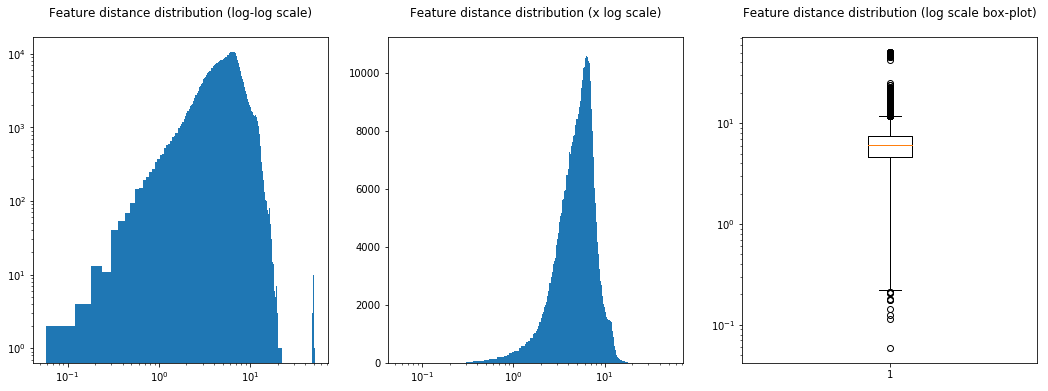

In [39]:
# distance distribution
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(distances, bins='auto')
plt.xscale('log')
plt.yscale('log')
plt.title('Feature distance distribution (log-log scale)')

plt.subplot(1, 3, 2)
plt.hist(distances, bins='auto')
plt.xscale('log')
plt.title('Feature distance distribution (x log scale)')

plt.subplot(1, 3, 3)
plt.boxplot(distances)
plt.yscale('log')
plt.title('Feature distance distribution (log scale box-plot)');


plt.savefig(dist_figures_path + 'feature_distance_distribution.png', dpi=500)

In [40]:
# Long to run
similarity = compute_trend(2000, sub_df)

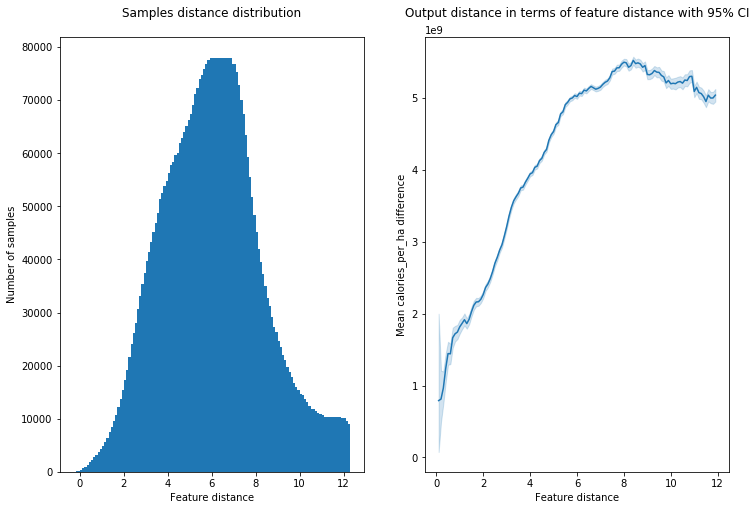

In [41]:
plot_trend(similarity, 12)
plt.savefig(agg_assumption_fig_path + 'similarity_2000_data.png', dpi=500)

In [42]:
normalized_df.to_csv(data_2000_path + 'normalized_2000.csv')

## 2000 data: feature similarity clusters

We now want to see what happens on the output side when we create clusters of points by feature distance and if we can plot the result on a map to see some georaphical separation.

### Clustering algorithm selection and tunning

In [46]:
normalized_df = pd.read_csv(data_2000_path + 'normalized_2000.csv', index_col='pixel_id')
normalized_df.head()

slope  Annual Mean Temperature  Mean Diurnal Range  \
pixel_id                                                          
1272549  -0.153686                -1.475497           -1.165186   
1276867  -0.044311                -1.450093           -1.237776   
1276868  -0.064612                -1.451896           -1.224768   
1298466  -0.029986                -1.373057           -1.550443   
1298467  -0.027755                -1.386652           -1.462573   

          Isothermality  Temperature Seasonality  \
pixel_id                                           
1272549       -1.144281                 0.809341   
1276867       -1.168411                 0.799235   
1276868       -1.167575                 0.812007   
1298466       -1.245204                 0.779111   
1298467       -1.218038                 0.766754   

          Max Temperature of Warmest Month  Min Temperature of Coldest Month  \
pixel_id                                                                       
1272549                          -1.712443                         -1.131726   
1276867                          -1.697998                         -1.119308   
1276868                          -1.682255                         -1.121053   
1298466                          -1.614412                         -0.995392   
1298467                          -1.639893                         -1.020766   

          Temperature Annual Range  Annual Precipitation  \
pixel_id                                                   
1272549                   0.526905             -0.529328   
1276867                   0.518887             -0.542167   
1276868                   0.529160             -0.552153   
1298466                   0.407722             -0.629187   
1298467                   0.426180             -0.619201   

          Precipitation of Wettest Month  ...  irrig_c4per  \
pixel_id                                  ...                
1272549                        -0.764668  ...    -0.408186   
1276867                        -0.789142  ...    -0.408186   
1276868                        -0.780984  ...    -0.408186   
1298466                        -0.797301  ...    -0.408186   
1298467                        -0.789142  ...    -0.408186   

          nutrient_availability_index  oxygen_availability_index  \
pixel_id                                                           
1272549                      0.333333                   0.500000   
1276867                      0.333333                   0.500000   
1276868                      0.333333                   0.333333   
1298466                      0.333333                   0.500000   
1298467                      0.333333                   0.333333   

          workability_index  protected_areas_index  nutrient_retention_index  \
pixel_id                                                                       
1272549                 0.0                    1.0                  0.166667   
1276867                 0.0                    0.0                  0.166667   
1276868                 0.0                    0.0                  0.333333   
1298466                 0.0                    1.0                  0.166667   
1298467                 0.0                    0.0                  0.166667   

          toxicity_index  excess_salts_index  rooting_conditions_index  \
pixel_id                                                                 
1272549              0.0                 0.0                       0.0   
1276867              0.0                 0.0                       0.0   
1276868              0.0                 0.0                       0.0   
1298466              0.0                 0.0                       0.0   
1298467              0.0                 0.0                       0.0   

          log_calories_per_ha  
pixel_id                       
1272549             22.911327  
1276867             22.911327  
1276868             22.911327  
1298466             22.911327  
1298467     

In [14]:
def apply_kmeans(df, k):
    dataframe = df.copy().dropna()
    
    if 'log_calories_per_ha' in dataframe.columns:
        clustering_input = dataframe.drop('log_calories_per_ha', axis=1)
    else: clustering_input = dataframe
    
        
    print('Applying Kmeans for k={}'.format(k))
    kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_input.values)
    dataframe['label_' + str(k)] = -1
    dataframe['label_' + str(k)][dataframe.notnull().all(axis=1)] = kmeans.labels_
        
    return kmeans, dataframe

In [138]:
k = 10

In [69]:
kmeans_2000, normalized_df = apply_kmeans(normalized_df[input_col], k)

Applying Kmeans for k=10


/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [70]:
normalized_df.to_csv(data_2000_path + 'clustered_2000.csv')

### Visualize the clusters

In [71]:
clustered_2000 = pd.read_csv(data_2000_path + 'clustered_2000.csv', index_col='pixel_id')

In [67]:
def visualize_clusters(df_labels, fig, ax, title, shape=(2160, 4320), savefig=False, outside=None, explain=None):
    
    # Set labels to -1
    labels_array = np.zeros((shape[0]*shape[1],)) - 1
    labels_array[df_labels.index] = df_labels.values
    labels_df = pd.DataFrame(labels_array, columns=['label'])
    
    if outside is not None:
        labels_array[outside] = -2
    
    labels = df_labels.unique()
    k = len(labels)
    
    #Colormap
    if k <= 10: cmap = plt.cm.tab10
    else: cmap = plt.cm.tab20b
    cmaplist = [cmap(i) for i in range(cmap.N)][:k]
    cmaplist.insert(0, (1, 1, 1))
    
    if outside is not None: cmaplist.insert(0, (0, 0, 0))
        
    cmap = colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, len(cmaplist))
    
    #Plot data
    data = labels_df['label'].values
    bm = Basemap()
    im = bm.imshow(np.flipud(data.reshape(shape)), cmap=cmap, ax=ax)
    bm.drawcoastlines(linewidth=0.15, color='0.1', ax=ax)
        
    ax.set_title(title)
    cb = fig.colorbar(im, drawedges=True, fraction=0.02, ticks=None, ax=ax)
    cb.set_label('Labels')
    cb.set_ticks([])
    cb.ax.invert_yaxis()
    
    if explain and not outside:
        labels_exp = [patches.Patch(color=cmaplist[i+1], label=lab) for i, lab in enumerate(explain)]
        plt.legend(handles=labels_exp, loc=3, title='Cluster characteristics')
        
  
    if savefig:
        fig.savefig(cluster_fig_path + 'clusters_map_2000' + '_' + str(k))


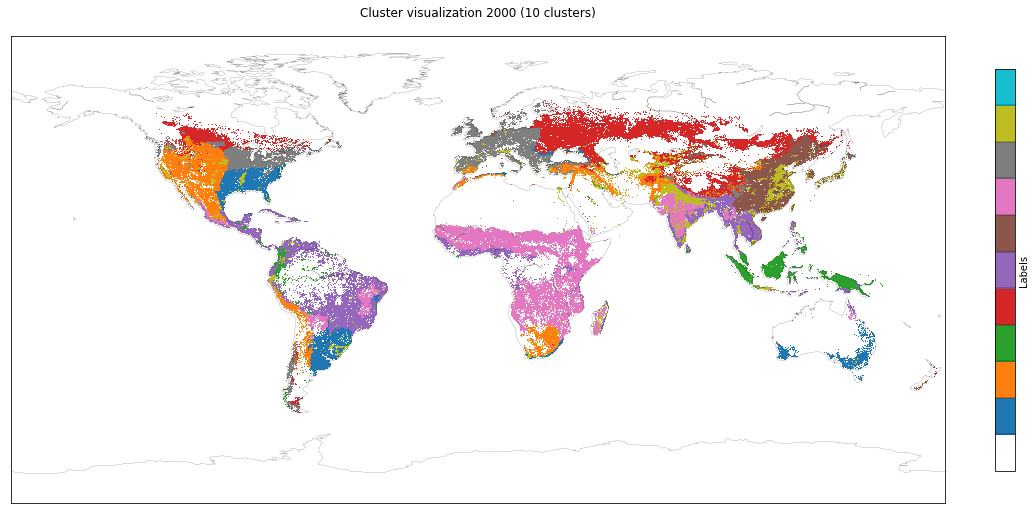

In [73]:
fig, ax = plt.subplots(figsize=(18, 12))
title = 'Cluster visualization 2000 ({} clusters)'.format(k)
visualize_clusters(clustered_2000['label_' + str(k)], fig, ax, title, savefig=False)

## Cluster the 2050 points based on the 2000 clusters

**Load the different 2050 datasets for each climate model and each scenario**

In [ ]:
k=10

In [90]:
df_2000 = pd.read_csv(data_2000_path + 'clustered_2000.csv', index_col='pixel_id')
if 'log_calories_per_ha' in input_col:
    input_col.remove('log_calories_per_ha')

In [63]:
files_2050 = os.listdir(data_2050_gdp_cont_path)
files_2050 = [filename for filename in files_2050 if 'ssp' in filename]

climate_models, climate_scenarios = [], []

for file in files_2050:
    if len(file) == 11:
        climate_models.append(file[:2])
        climate_scenarios.append(file[3:7])

climate_models = list(set(climate_models))
climate_models.sort()
climate_scenarios = list(set(climate_scenarios))
climate_scenarios.sort()
climate_models, climate_scenarios

(['cc', 'gs', 'he', 'mr'], ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])

### Create the clusters

In [153]:
def standardize_input(df, scaler, num_col, non_num_col, std_non_num_col=True):
    dataframe = df.copy()
    
    # Standardize numerical data
    scaled_features = scaler.transform(df[num_col].dropna().values)
    num_df = pd.DataFrame(scaled_features, index=df[num_col].dropna().index, columns=num_col)

    # Standardize categorical data
    dataframe = num_df.join(dataframe[non_num_col])
    if std_non_num_col == True:
        for col in non_num_col:
            dataframe[col] = dataframe[col] - dataframe[col].min()
            dataframe[col] = dataframe[col] / dataframe[col].max()
    return dataframe

In [141]:
def map_2000_clusters(df, columns, kmeans_2000, k):
    dataframe = df.copy().dropna()
            
    labels = kmeans_2000.predict(dataframe[columns].values)
    dataframe['label_' + str(k)] = labels
    
    return dataframe

In [81]:
# Clustering all the 2050 files
for model in climate_models:
    print('Clustering climate model {}:'.format(model))

    for ssp in climate_scenarios:
        print('{}:'.format(ssp))

        print('Loading dataframe')
        df = pd.read_csv(data_2050_gdp_cont_path + '{}_{}.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])

        # To match columns of 2000 data
        df = df.drop(['lat', '%cropland', 'lon'], axis=1)

        # We need to divide these clumns by 10
        to_divide = ['Mean Diurnal Range', 'Temperature Annual Range', 
                     'Min Temperature of Coldest Month', 'Annual Mean Temperature',
                     'Max Temperature of Warmest Month', 'Temperature Seasonality']
        df[to_divide] = df[to_divide].apply(lambda r: r/10)

        print('Normalizing the columns')
        df = standardize_input(df, scaler, numerical_col, non_numerical_col)

        print('Map the points to the 2000 clusters: k={}'.format(k))
        df = map_2000_clusters(df, input_col, kmeans_2000, k)

        print('Saving the clustered file')
        df.to_csv(data_2050_gdp_cont_clustered_path + 'based2000_clustered_{}_{}.csv'.format(model, ssp))

    print()

Clustering climate model cc:
ssp1:
Loading dataframe


/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp2:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp3:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp4:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp5:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file

Clustering climate model gs:
ssp1:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp2:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp3:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp4:
Loading dataframe
Normalizing the columns
Map the points to 

### Add the convex-hull (min-max)

#### Show points outside the convex hull on clusters map

In [142]:
def compute_min_max(df):
    min_max_dict = {}
    min_max = df.apply(lambda x: pd.Series([x.min(), x.max()])).T.values.tolist()
    for i, column in enumerate(df.columns):
        min_max_dict[column] = min_max[i]
    return min_max_dict

In [143]:
# returns true if all features are within minmax
# of 2000 data
def is_in_min_max(row, min_max):
    for column in min_max.keys():
        feature = row[column]
        if feature < min_max[column][0] or feature >  min_max[column][1]:
            return 0
    return 1

# returns proportion of data points within 2000 data min max
def get_proportion_out_min_max(min_max, prediction_df):
    in_out = prediction_df.apply(lambda row: is_in_min_max(row, min_max), axis=1)
    num_inside = in_out.sum()
    total_points = len(prediction_df)
    proportion_out = 1 - (num_inside/total_points)
    outside = in_out[in_out == 0].index
    return outside, proportion_out

In [144]:
def visualize_outside_hull(outside, fig, ax, title, shape=(2160, 4320), savefig=False):
    
    # Set labels to -1
    labels_array = np.zeros((shape[0]*shape[1],)) - 1
    labels_array[outside] = 0
    labels_df = pd.DataFrame(labels_array, columns=['label'])
    
    
    cmaplist = [(1, 1, 1), (0, 0, 0)]
    cmap = colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, 2)
    
    #Plot data
    data = labels_df['label'].values
    bm = Basemap()
    im = bm.imshow(np.flipud(data.reshape(shape)), cmap=cmap, ax=ax)
    bm.drawcoastlines(linewidth=0.15, color='0.1', ax=ax)
        
    ax.set_title(title)
    cb = fig.colorbar(im, drawedges=True, fraction=0.02, ticks=None, ax=ax)
    cb.set_label('Labels')
    cb.set_ticks([])
  
    if savefig != False:
        fig.savefig(convex_hull_fig_path + 'outside_convex_hull' + '_' + title + '.png', dpi=500)



In [88]:
min_max_original = compute_min_max(df_2000[input_col])

Checking points in model cc:
ssp1:
Loading dataframe


/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Checking percentage outside min-max 2000:
Outside: 9.37%
Plotting the points on a map:
ssp2:
Loading dataframe
Checking percentage outside min-max 2000:
Outside: 2.17%
Plotting the points on a map:
ssp3:
Loading dataframe
Checking percentage outside min-max 2000:
Outside: 1.32%
Plotting the points on a map:
ssp4:
Loading dataframe
Checking percentage outside min-max 2000:
Outside: 15.22%
Plotting the points on a map:
ssp5:
Loading dataframe
Checking percentage outside min-max 2000:
Outside: 26.06%
Plotting the points on a map:
Checking points in model gs:
ssp1:
Loading dataframe
Checking percentage outside min-max 2000:
Outside: 9.26%
Plotting the points on a map:
ssp2:
Loading dataframe
Checking percentage outside min-max 2000:
Outside: 2.02%
Plotting the points on a map:
ssp3:
Loading dataframe
Checking percentage outside min-max 2000:
Outside: 1.35%
Plotting the points on a map:
ssp4:
Loading dataframe
Checking percentage outside min-max 2000:
Outside: 15.25%
Plotting the points on 

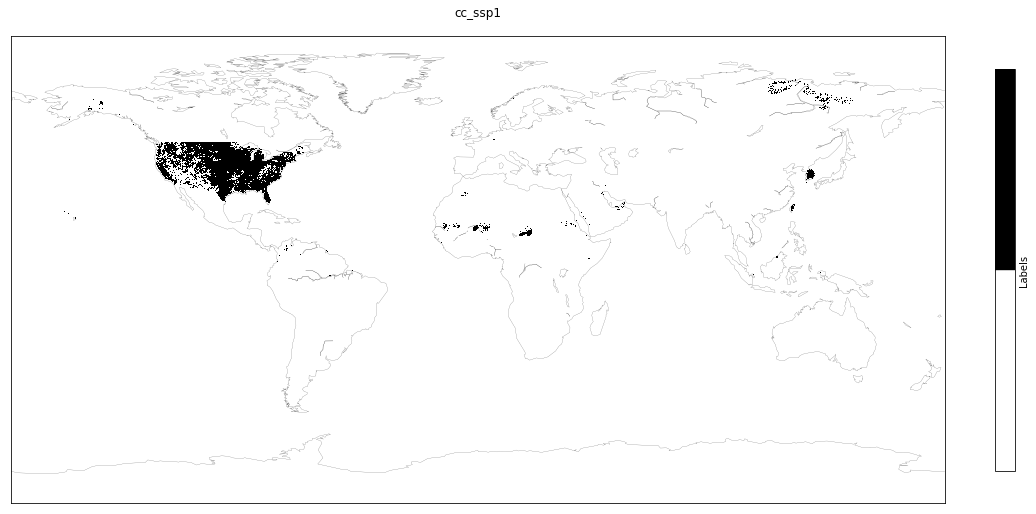

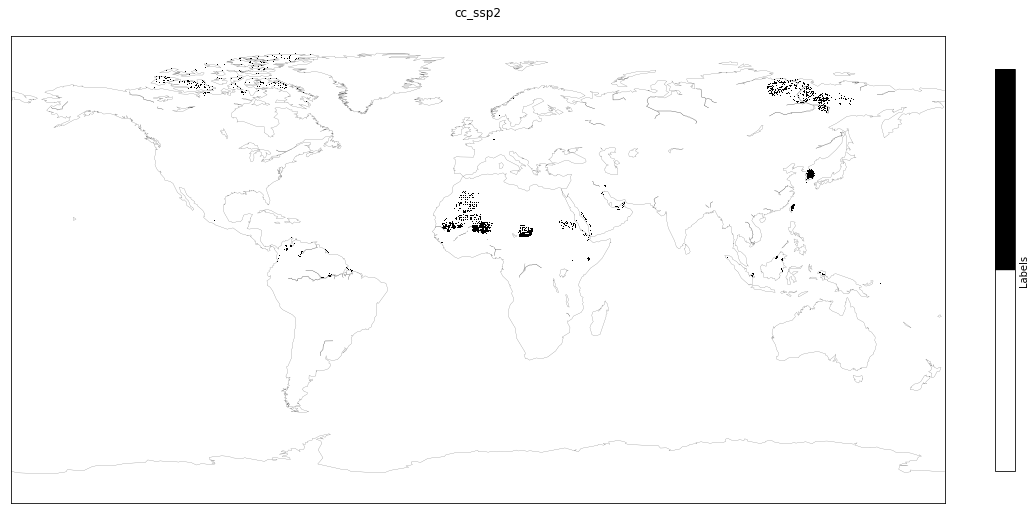

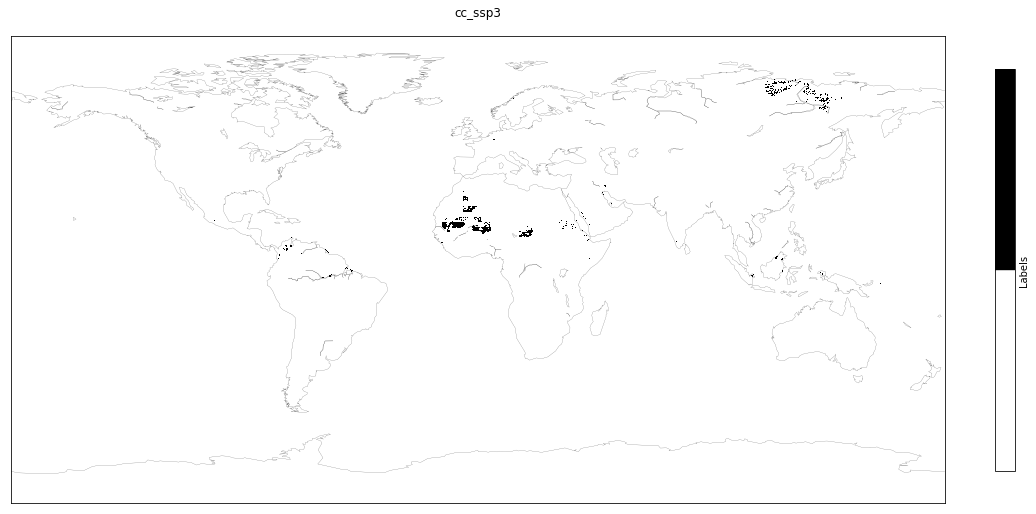

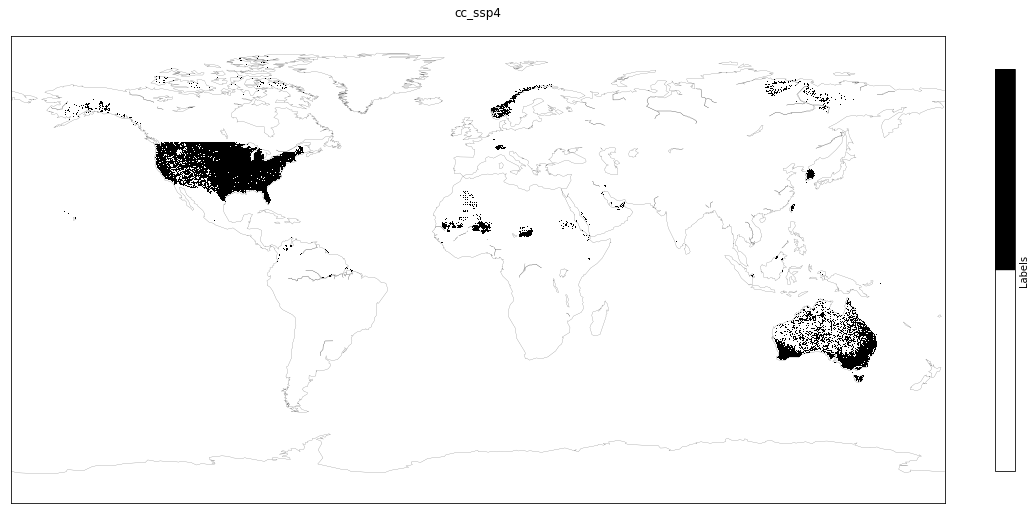

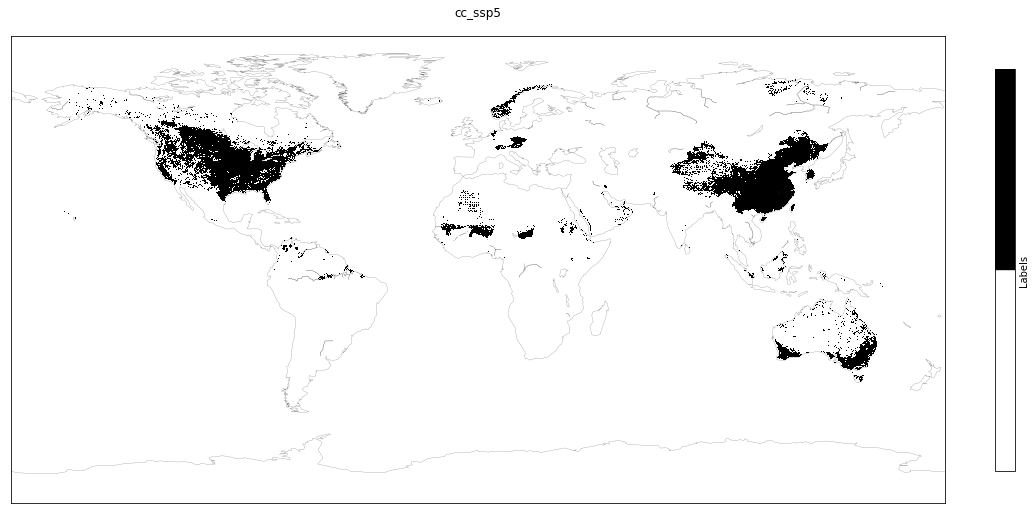

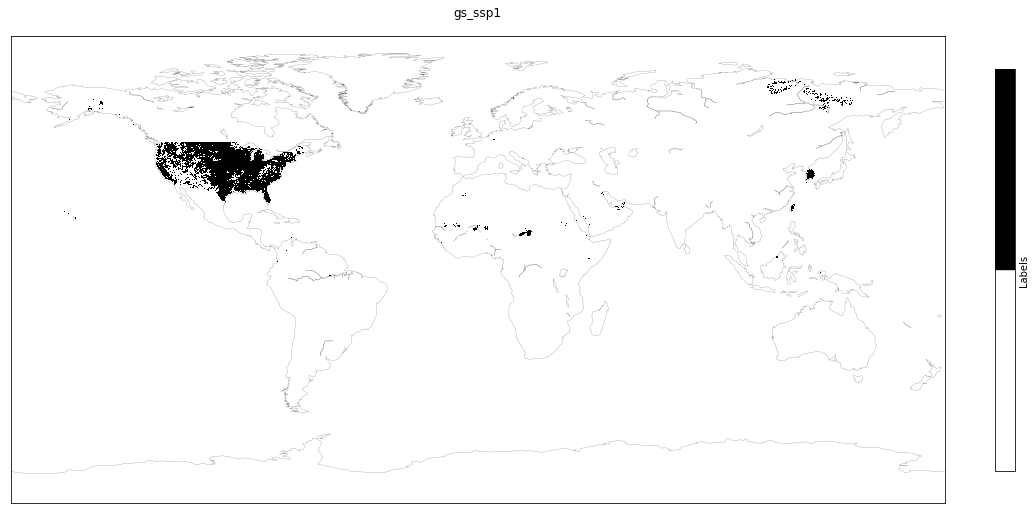

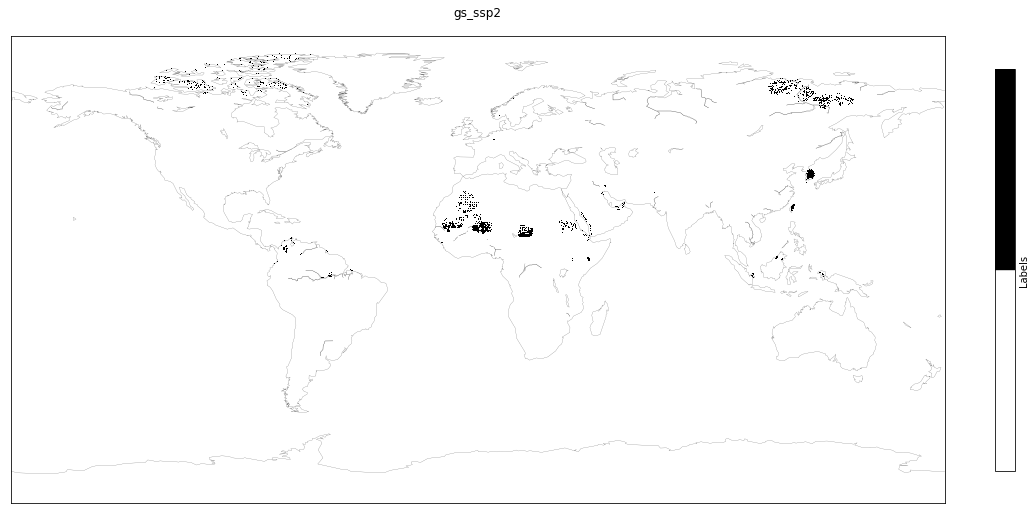

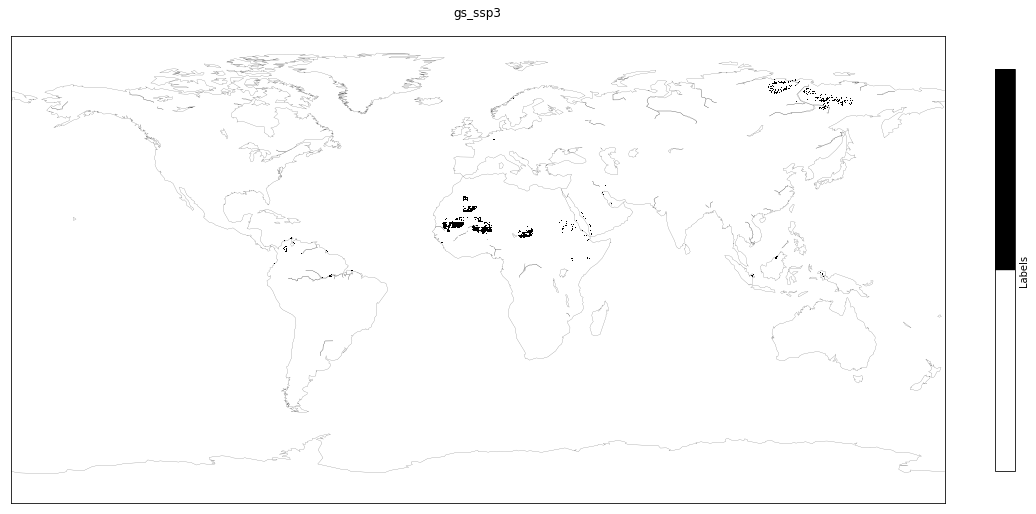

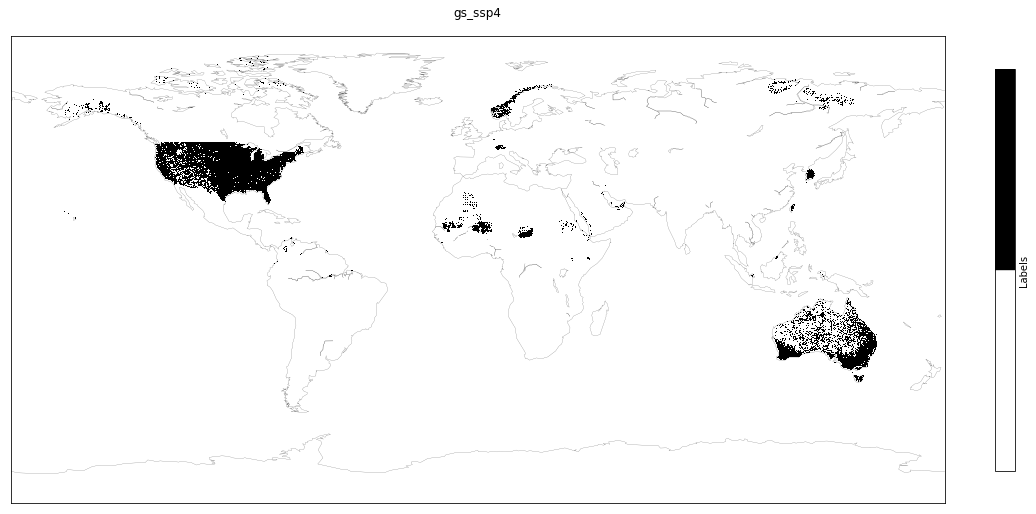

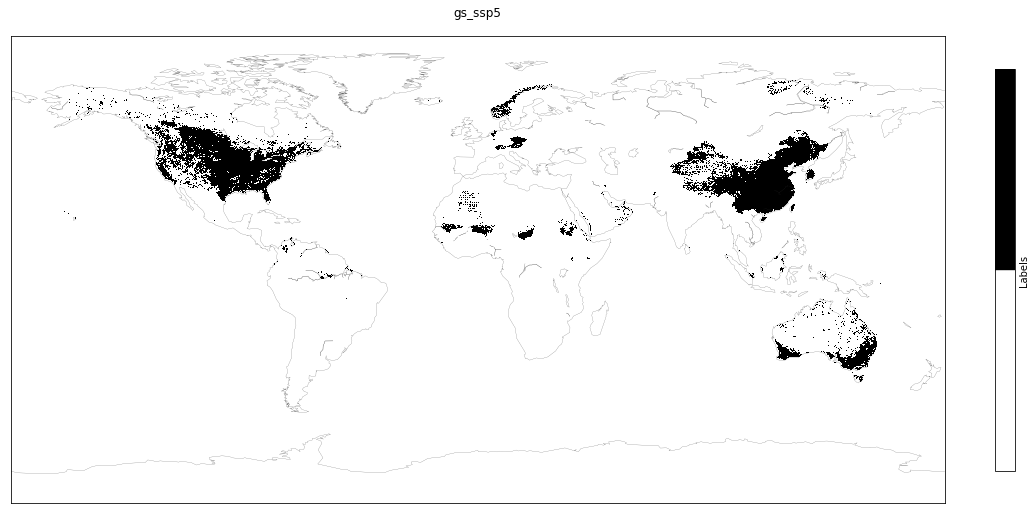

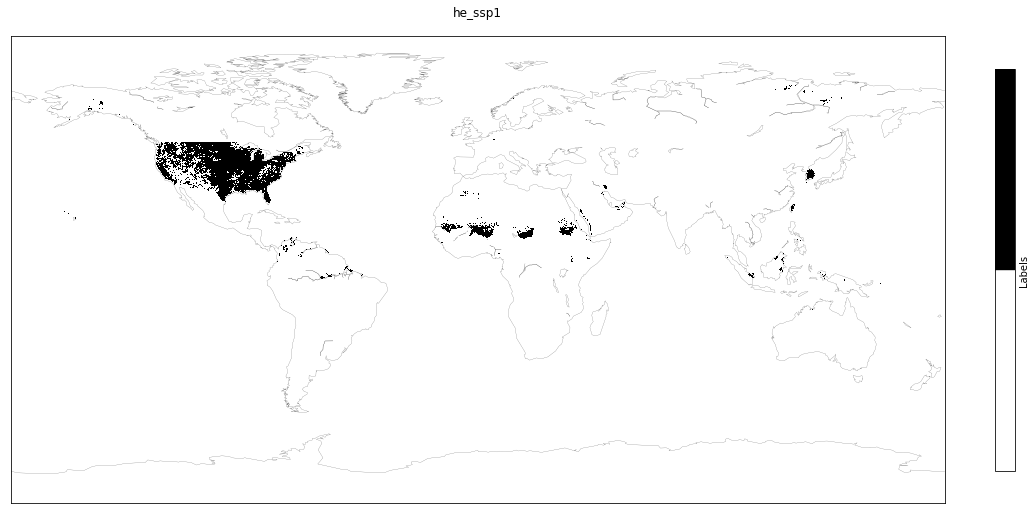

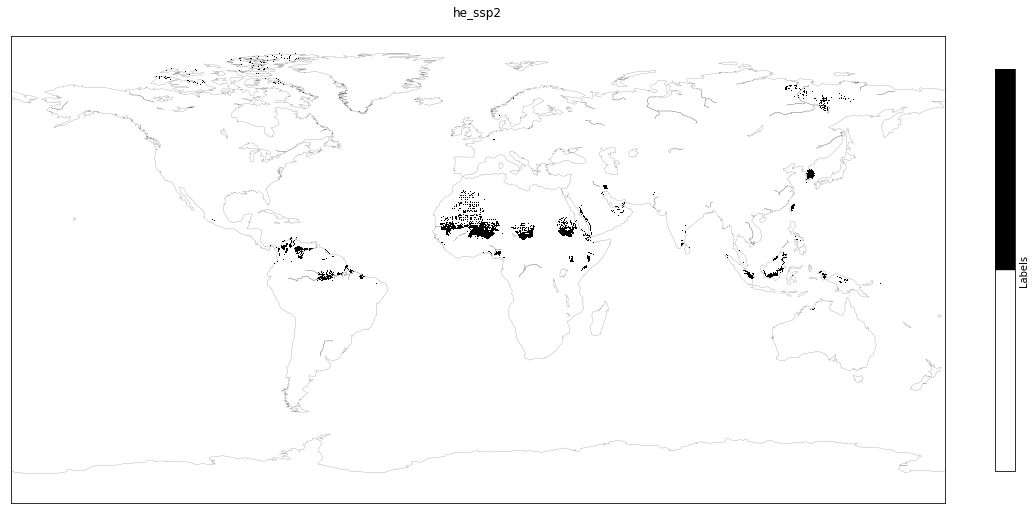

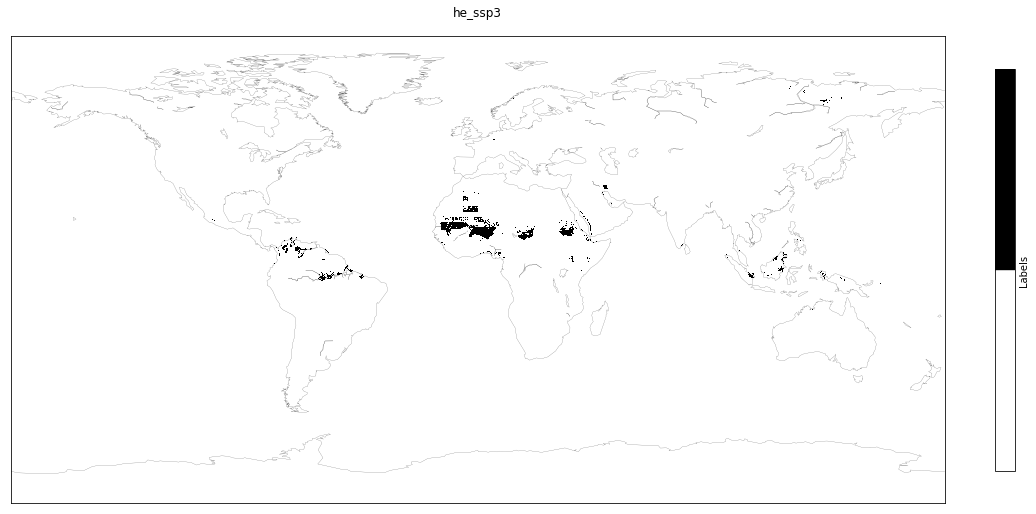

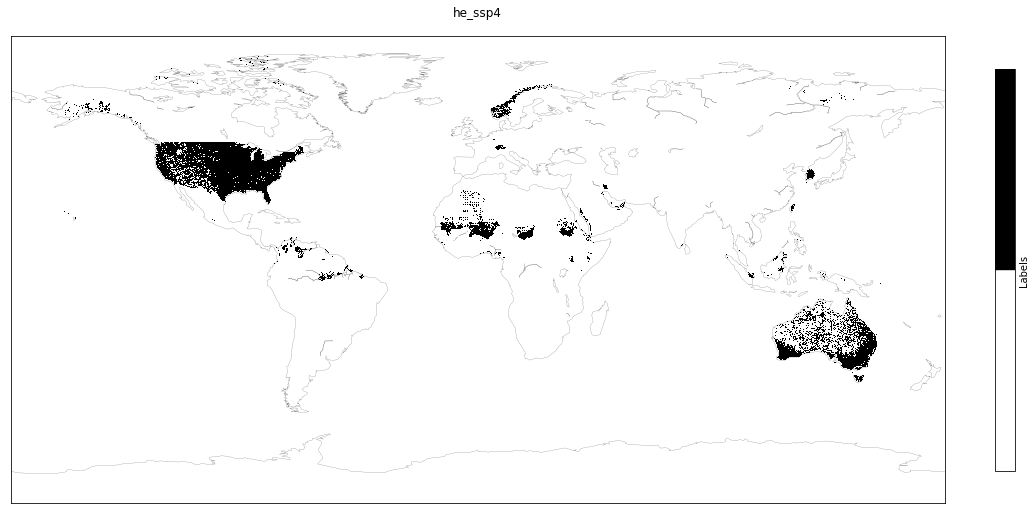

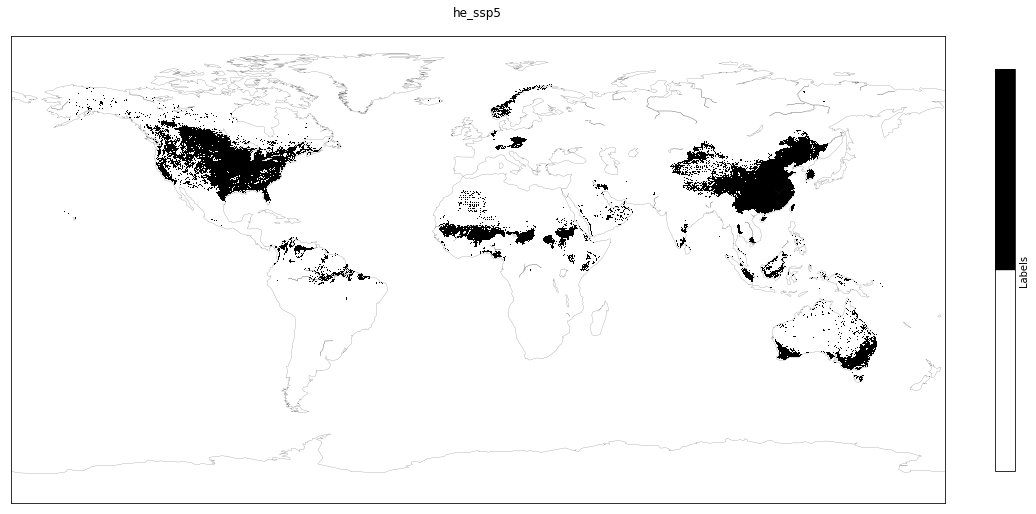

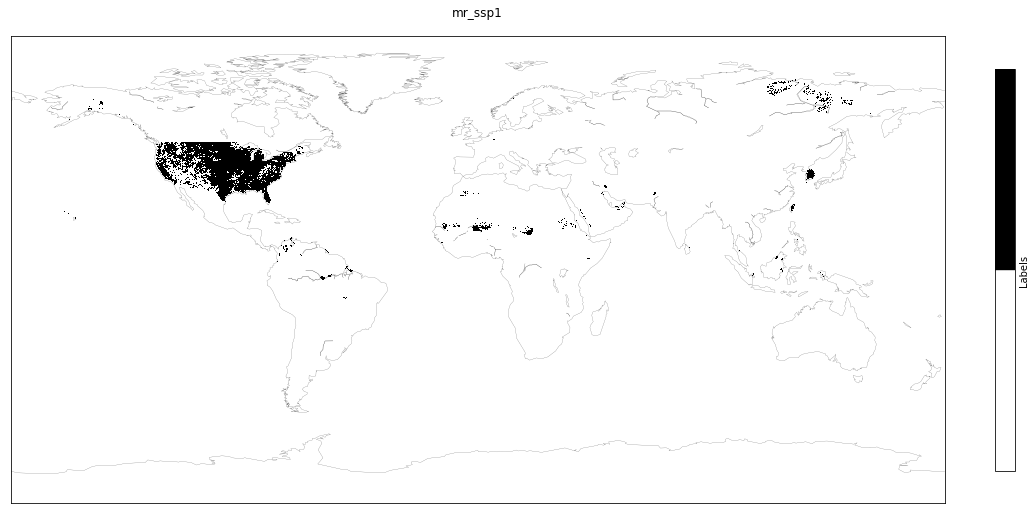

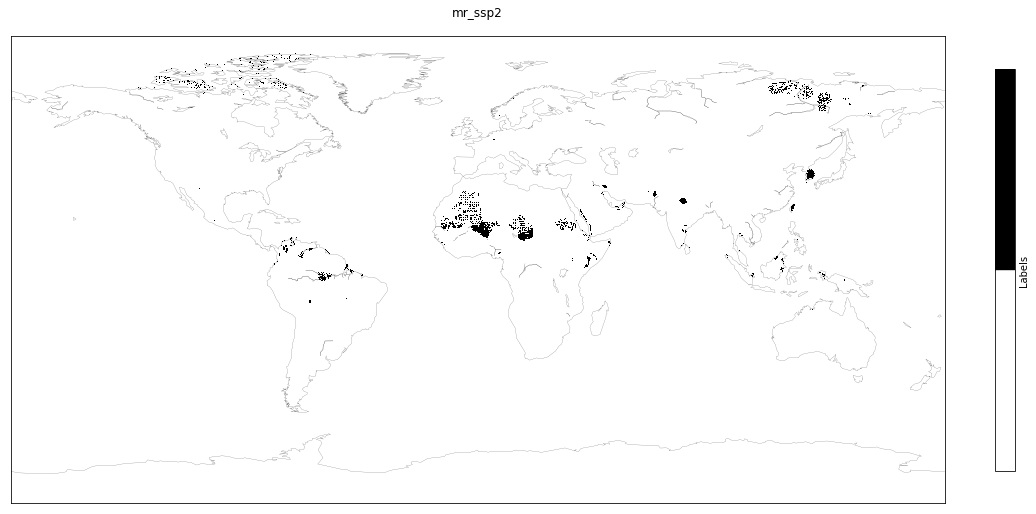

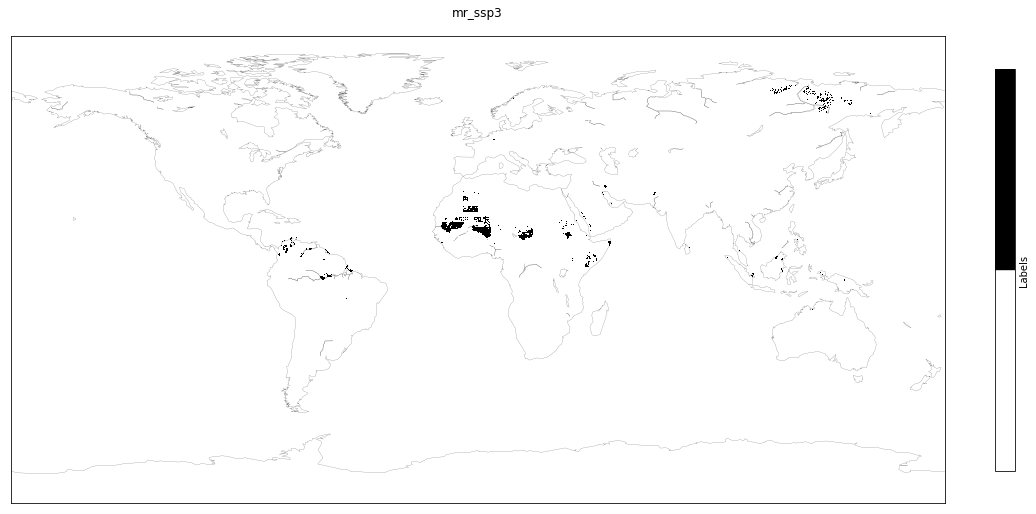

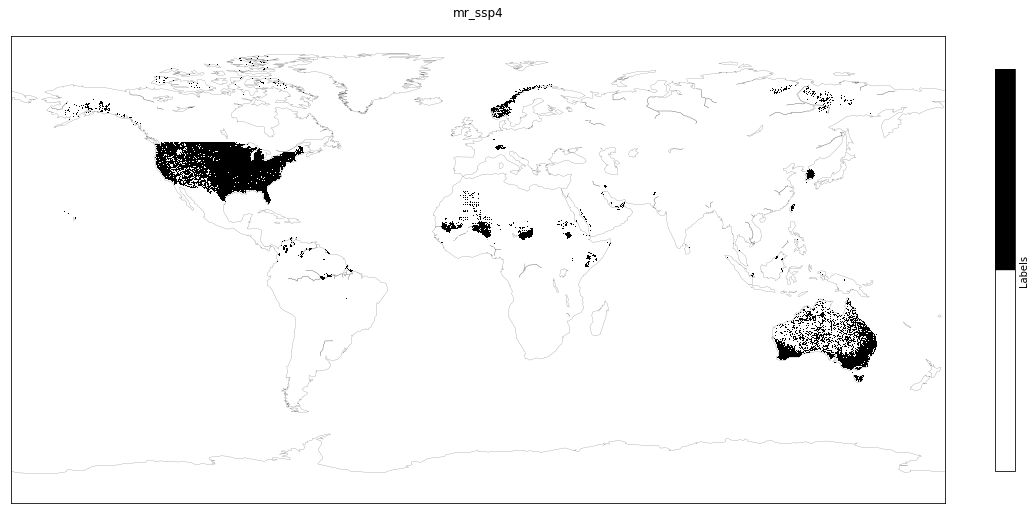

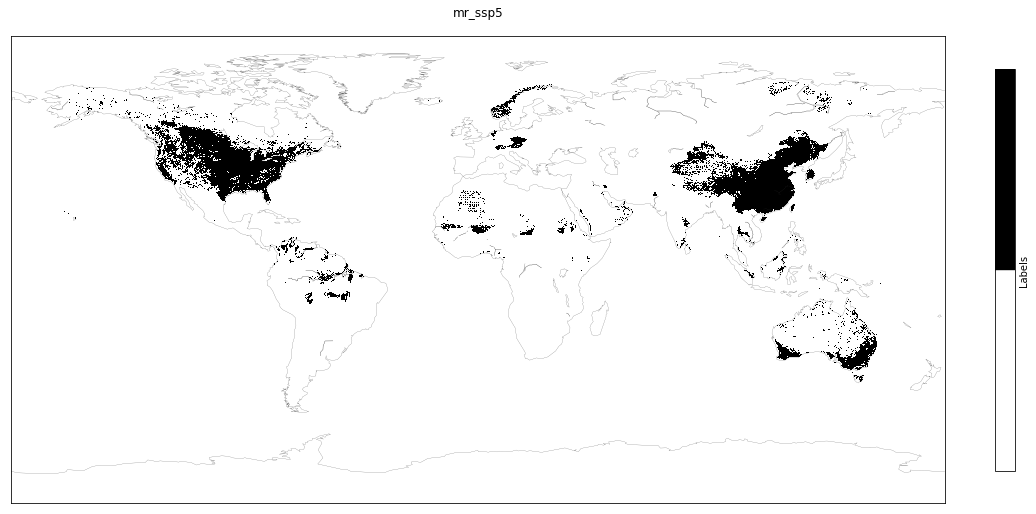

In [89]:
for model in climate_models:
    print('Checking points in model {}:'.format(model))

    for ssp in climate_scenarios:
        print('{}:'.format(ssp))

        print('Loading dataframe')
        df = pd.read_csv(data_2050_gdp_cont_clustered_path + 'based2000_clustered_{}_{}.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
        
        print('Checking percentage outside min-max 2000:')
        outside, prop_out = get_proportion_out_min_max(min_max_original, df[input_col])
        print('Outside: {:.2f}%'.format(100*prop_out))
        
        print('Plotting the points on a map:')
        fig, ax = plt.subplots(figsize=(18, 12))
        visualize_outside_hull(outside, fig, ax, '{}_{}'.format(model, ssp), savefig=False)
    print()

### Visualize the clusters and the convex-hulls

cc
ssp1
Checking percentage outside min-max 2000:
Outside: 9.37%
ssp2
Checking percentage outside min-max 2000:
Outside: 2.17%
ssp3
Checking percentage outside min-max 2000:
Outside: 1.32%
ssp4
Checking percentage outside min-max 2000:
Outside: 15.22%
ssp5
Checking percentage outside min-max 2000:
Outside: 26.06%
gs
ssp1
Checking percentage outside min-max 2000:
Outside: 9.26%
ssp2
Checking percentage outside min-max 2000:
Outside: 2.02%
ssp3
Checking percentage outside min-max 2000:
Outside: 1.35%
ssp4
Checking percentage outside min-max 2000:
Outside: 15.25%
ssp5
Checking percentage outside min-max 2000:
Outside: 25.66%
he
ssp1
Checking percentage outside min-max 2000:
Outside: 10.15%
ssp2
Checking percentage outside min-max 2000:
Outside: 3.36%
ssp3
Checking percentage outside min-max 2000:
Outside: 2.42%
ssp4
Checking percentage outside min-max 2000:
Outside: 16.23%
ssp5
Checking percentage outside min-max 2000:
Outside: 29.64%
mr
ssp1
Checking percentage outside min-max 2000:
Outs

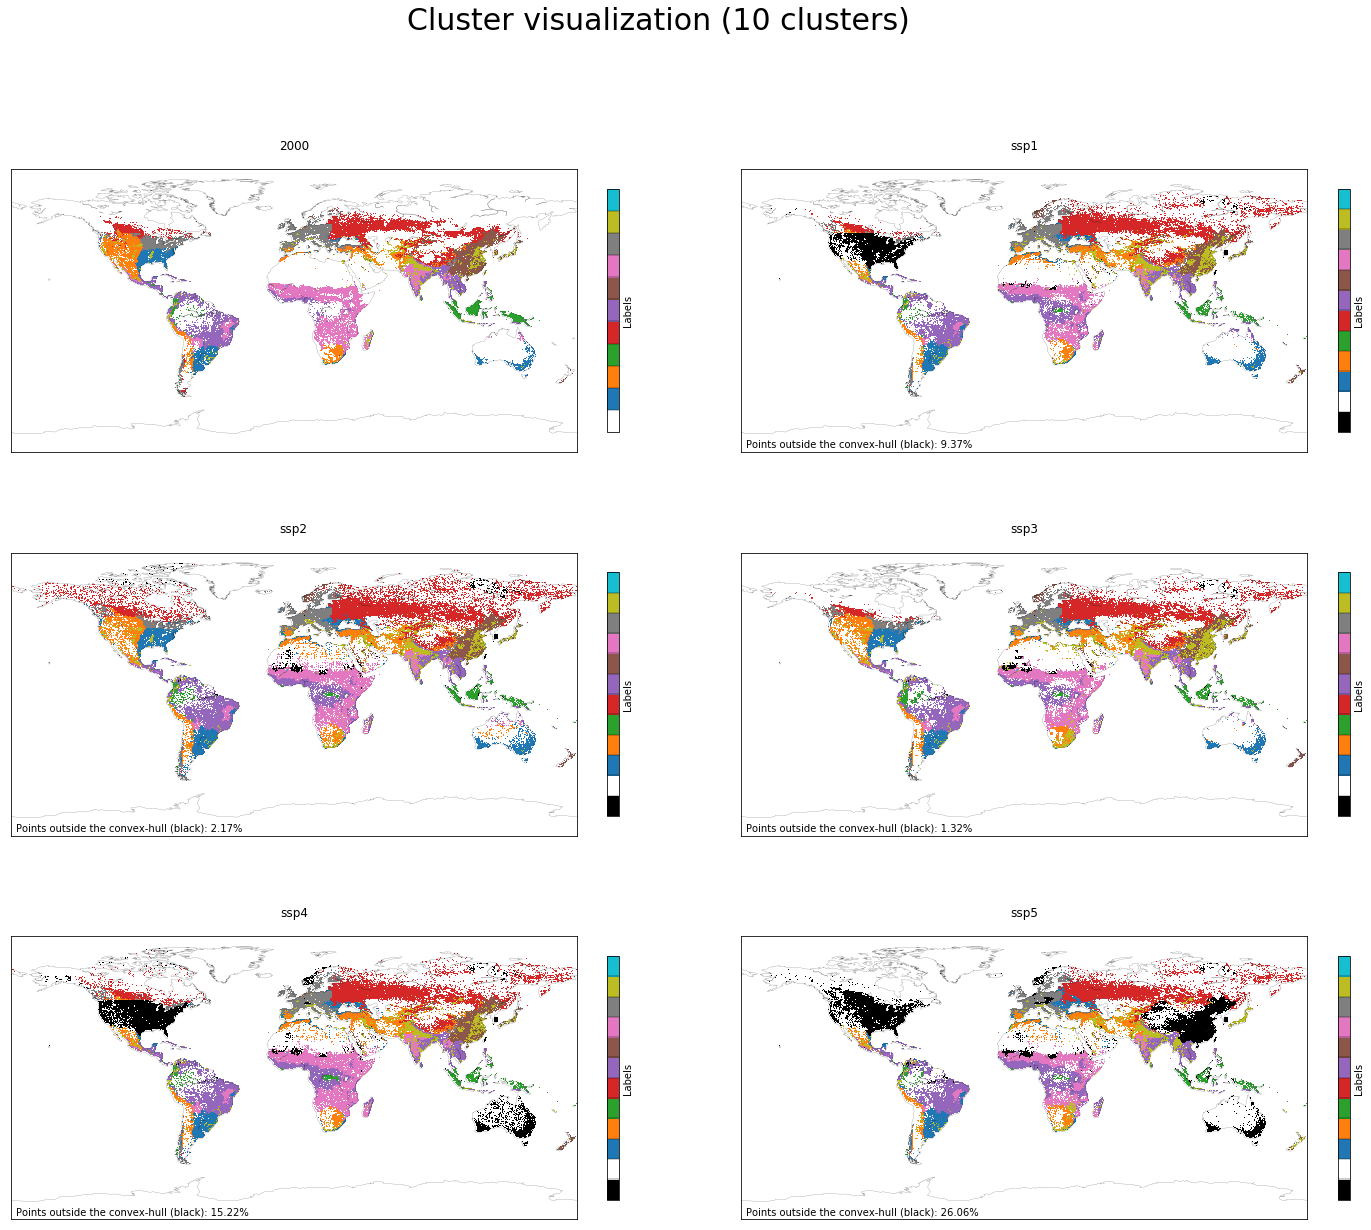

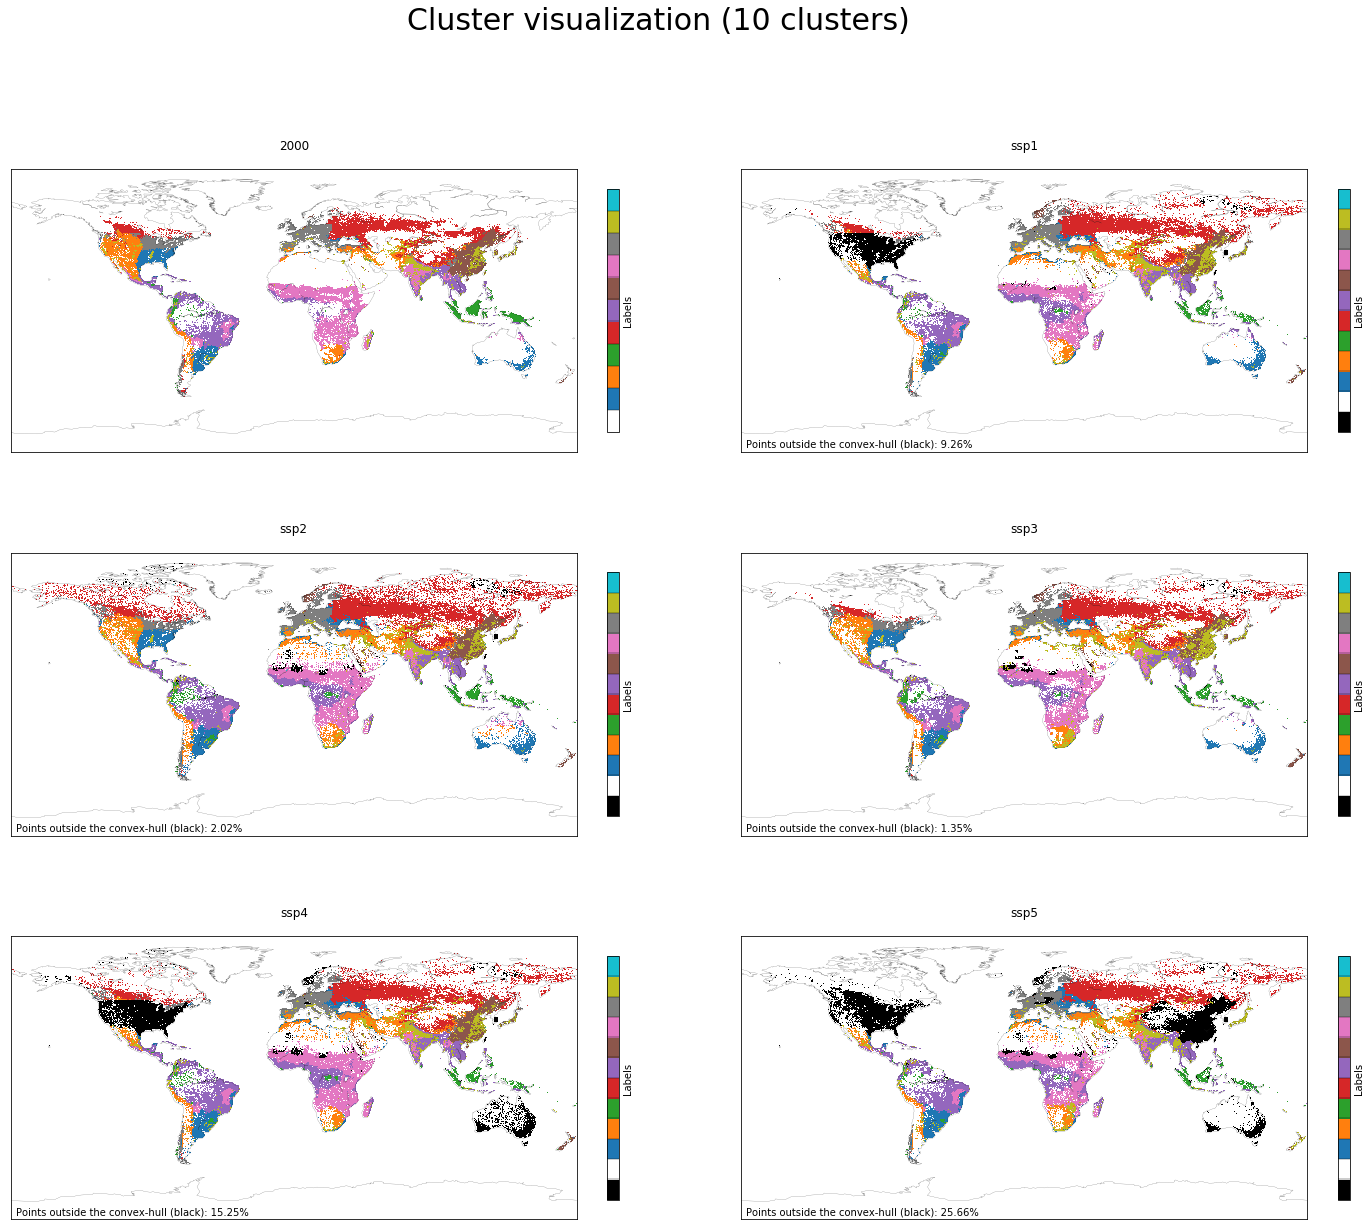

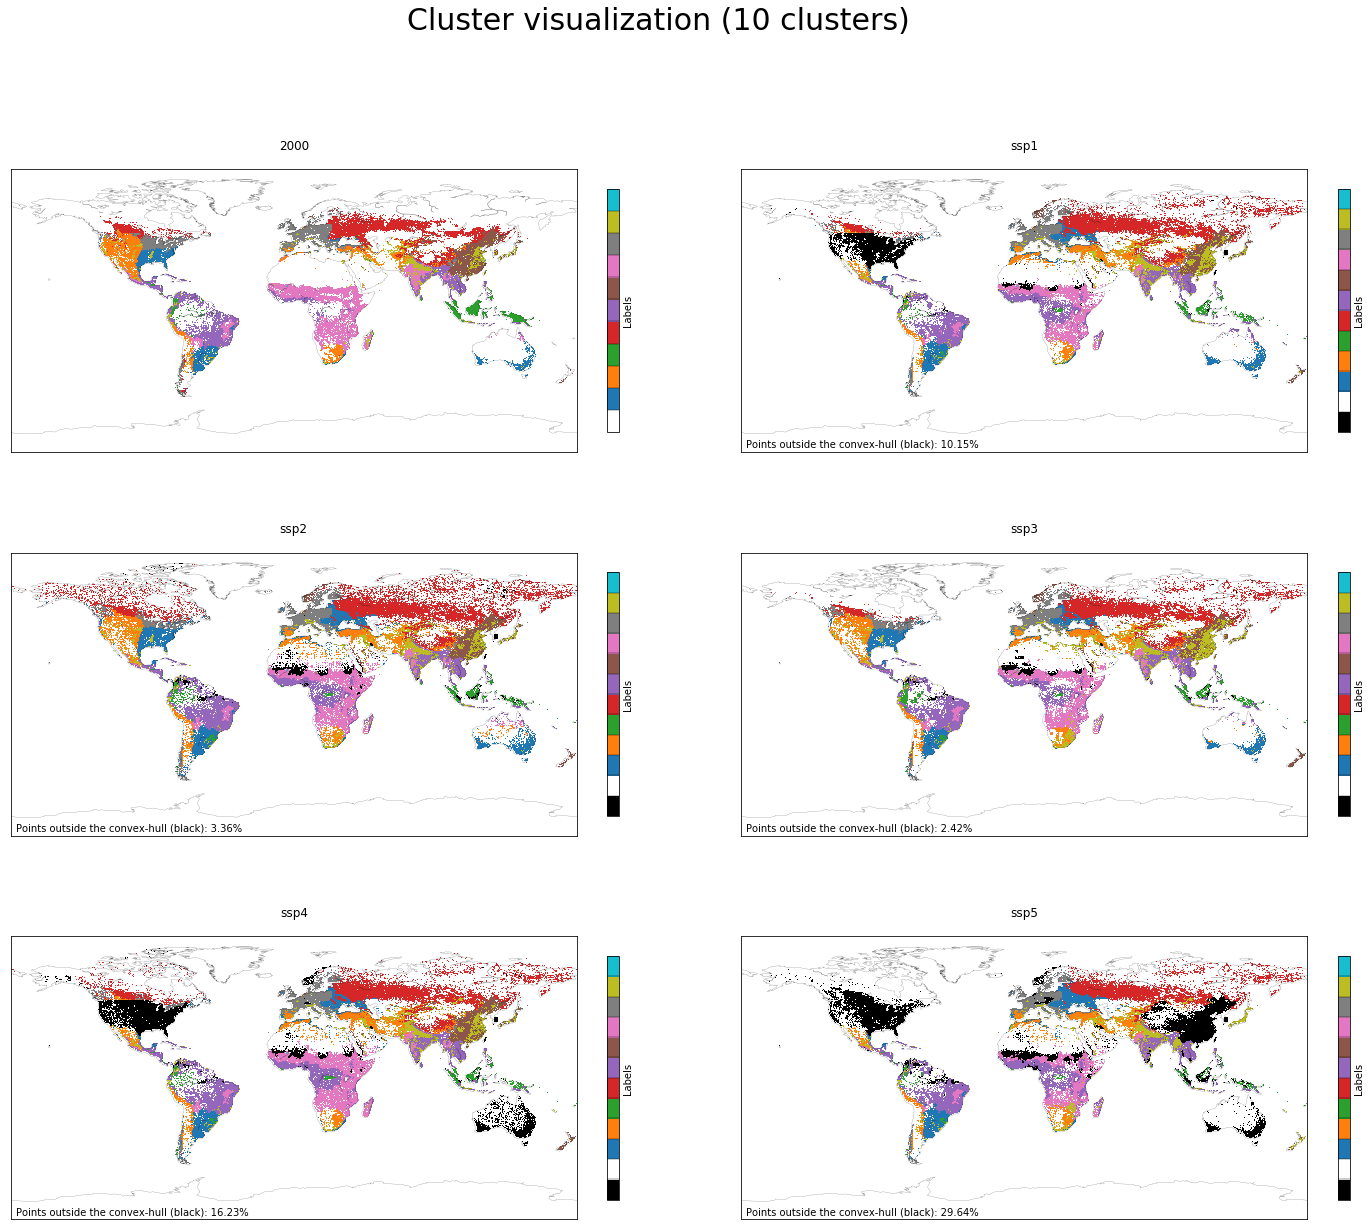

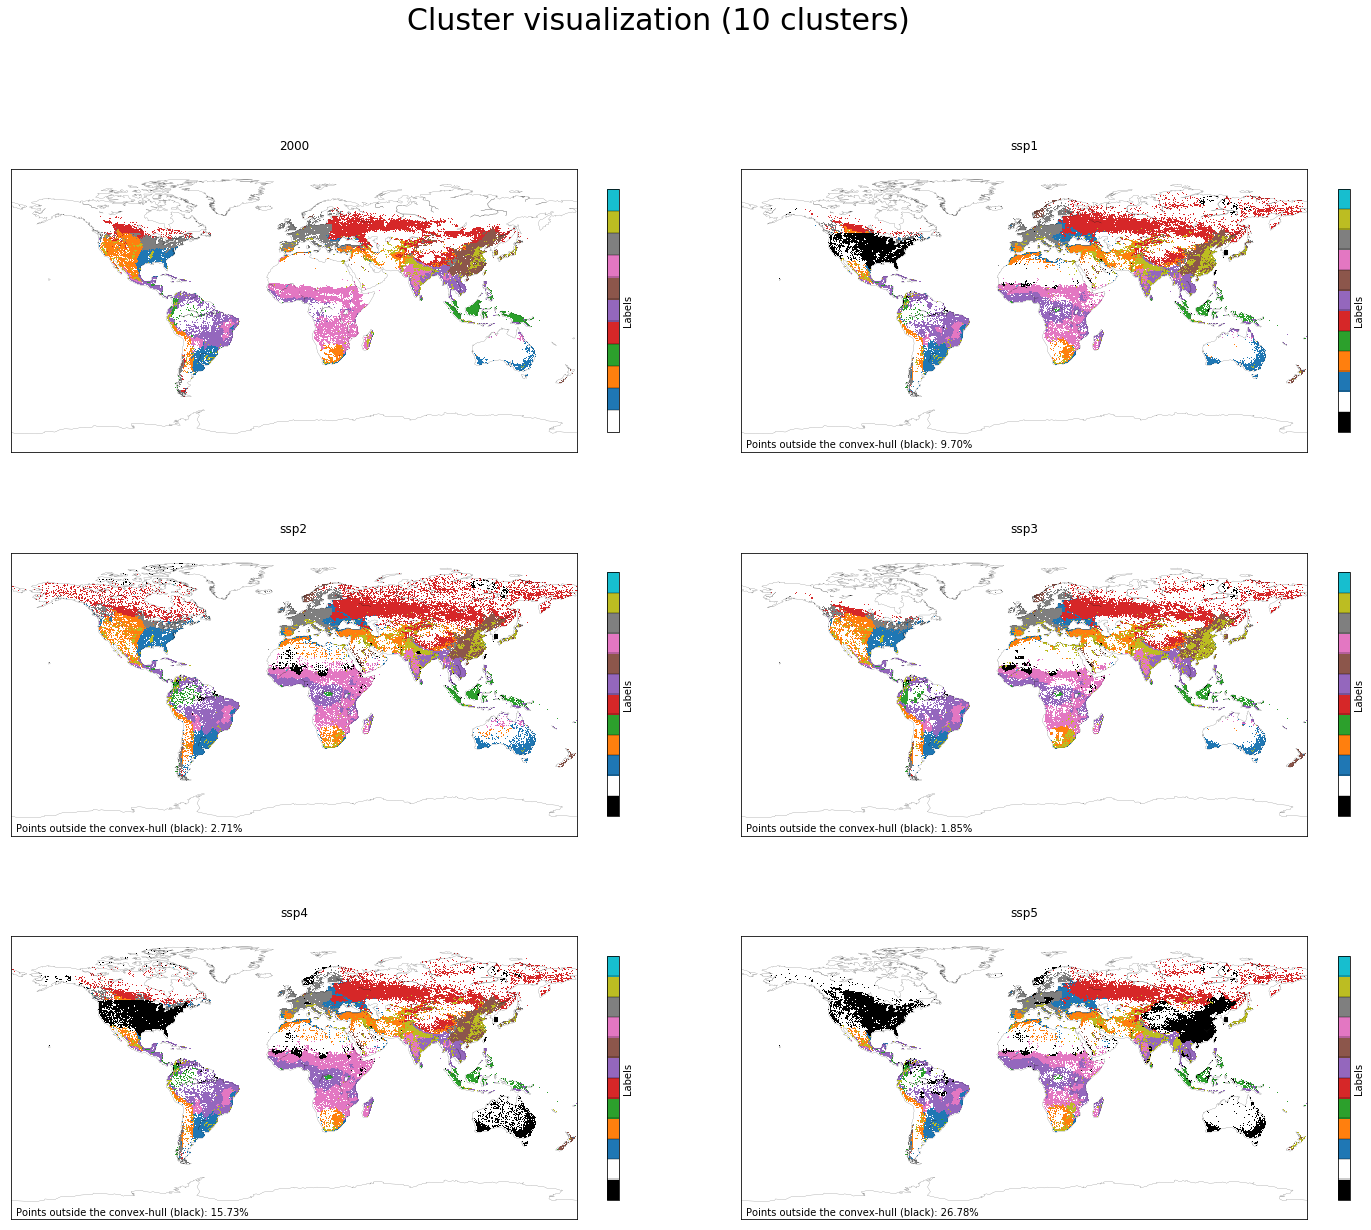

In [94]:
# Visualize the clusters for each climate scenario
for model in climate_models: 
    print(model)
    fig = plt.figure(figsize=(24, 20))
    fig.suptitle('Cluster visualization ({} clusters, {})'.format(k, model), fontsize=20)
    ax = plt.subplot(321)
    visualize_clusters(df_2000['label_' + str(k)], fig, ax, '2000')
    
    for i, ssp in enumerate(climate_scenarios): 
        print(ssp)
        df = pd.read_csv(data_2050_gdp_cont_clustered_path + 'based2000_clustered_{}_{}.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
        ax = plt.subplot(321 + i + 1)

        print('Checking percentage outside min-max 2000:')
        outside, prop_out = get_proportion_out_min_max(min_max_original, df[input_col])
        print('Outside: {:.2f}%'.format(100*prop_out))

        visualize_clusters(df['label_' + str(k)], fig, ax, '{}'.format(ssp), outside=outside, savefig=True)
        ax.annotate('Points outside the convex-hull (black): {:.2f}%'.format(100*prop_out), xy=(5, 5), xycoords='axes points')
    
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    fig.savefig(cluster_fig_path + 'based2000clusters_map_{}_{}.png'.format(model, k), dpi=500)

## Transform the GDP to create multiple bins with world bank data

In [49]:
df_2000 = pd.read_csv(data_2000_path + 'normalized_2000.csv', index_col='pixel_id')
if 'log_calories_per_ha' in input_col:
    input_col.remove('log_calories_per_ha')

(array([64., 32., 24.,  8., 11., 14.,  3.,  4.,  0.,  1.]),
 array([0.01098677, 0.62212852, 1.23327027, 1.84441201, 2.45555376,
        3.06669551, 3.67783726, 4.28897901, 4.90012076, 5.51126251,
        6.12240425]),
 <a list of 10 Patch objects>)

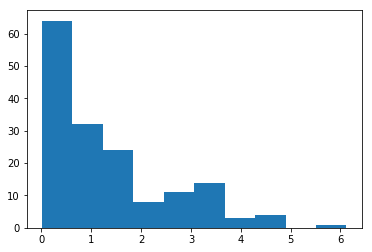

In [6]:
plt.hist(df_2000['log_GDP_pc'].apply(lambda val: np.exp(val)).unique())

In [7]:
df_2000['log_GDP_pc'].describe()

count    9.067700e+05
mean    -7.547611e-16
std      1.000001e+00
min     -4.511064e+00
25%     -6.311327e-01
50%      2.198040e-01
75%      5.126189e-01
max      1.811955e+00
Name: log_GDP_pc, dtype: float64

2000:

low income: log_GDP_pc < -0.28 (USD equivalent: GDP_pc < 755)

medium-low: -0.28 < log_GDP_pc < 1.1 (USD equivalent: 756 < GDP_pc < 3000)

medium-high: 1.1 < log_GDP_pc < 2.3 (USD equivalent: 3000 < GDP_pc < 10000)

high: log_GDP_pc > 2.3 (USD equivalent: GDP_pc > 10000)


https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2017&start=2000&year_low_desc=true

In [50]:
gdp_thresholds = [-0.28, 1.1, 2.3]
gdp_thresholds_stand = [(val - original_df['log_GDP_pc'].mean())/original_df['log_GDP_pc'].std() for val in gdp_thresholds]
gdp_thresholds_stand

[-1.9312480501860068, -0.785933469911681, 0.20999225206599337]

In [51]:
def get_index_inserted(l, e):
    bisect.insort(l, e)
    return l.index(e)

In [52]:
df_2000['cat_gdp'] = df_2000['log_GDP_pc'].apply(lambda v: get_index_inserted(gdp_thresholds_stand.copy(), v))
df_2000['cat_gdp'] = (df_2000['cat_gdp'] - df_2000['cat_gdp'].min()) / (df_2000['cat_gdp'].max() - df_2000['cat_gdp'].min())

In [53]:
df_2000.to_csv(data_2000_path + 'normalized_2000_gdp_cat.csv')

161

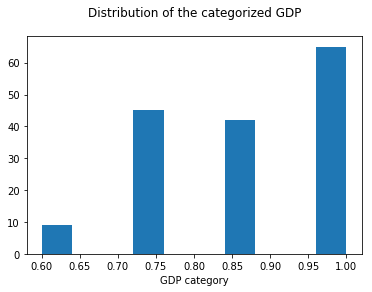

In [21]:
df_2000 = pd.read_csv(data_2000_path + 'normalized_2000_gdp_cat.csv')
gdp_unique = df_2000['log_GDP_pc'].unique()
gdp_unique_cat = [get_index_inserted(gdp_thresholds_stand.copy(), v) for v in gdp_unique]
gdp_unique_cat = (gdp_unique_cat - min(gdp_unique)) / (max(gdp_unique_cat) - min(gdp_unique))
plt.hist(gdp_unique_cat)
plt.xlabel('GDP category')
plt.title('Distribution of the categorized GDP')
plt.savefig(dist_figures_path + 'dist_cat_gdp_2000.png', dpi=500)
len(gdp_unique)

In [54]:
files_2050 = os.listdir(data_2050_gdp_cont_path)
files_2050 = [filename for filename in files_2050 if 'ssp' in filename]

climate_models, climate_scenarios = [], []

for file in files_2050:
    if len(file) == 11:
        climate_models.append(file[:2])
        climate_scenarios.append(file[3:7])

climate_models = list(set(climate_models))
climate_models.sort()
climate_scenarios = list(set(climate_scenarios))
climate_scenarios.sort()
climate_models, climate_scenarios

(['cc', 'gs', 'he', 'mr'], ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])

**Transform 2050 data**

In [202]:
for model in climate_models:
    print(model)
    for ssp in climate_scenarios:
        print(ssp)
        df = pd.read_csv(data_2050_gdp_cont_path + '{}_{}.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
        df['cat_gdp'] = df['log_GDP_pc'].apply(lambda v: get_index_inserted(gdp_thresholds_stand.copy(), v))
        df['cat_gdp'] = (df['cat_gdp'] - df['cat_gdp'].min()) / (df['cat_gdp'].max() - df['cat_gdp'].min())
        df.to_csv(data_2050_gdp_income_path + '{}_{}_gdp_cat.csv'.format(model, ssp))

cc
ssp1
ssp2
ssp3
ssp4
ssp5
gs
ssp1
ssp2
ssp3
ssp4
ssp5
he
ssp1
ssp2
ssp3
ssp4
ssp5
mr
ssp1
ssp2
ssp3
ssp4
ssp5


## Transform gdp with statistical sepration

In [55]:
df_2000 = pd.read_csv(data_2000_path + 'normalized_2000.csv', index_col='pixel_id')
if 'log_calories_per_ha' in input_col:
    input_col.remove('log_calories_per_ha')

In [56]:
gdp_unique = df_2000['log_GDP_pc'].unique()
gdp_unique_df = pd.Series(df_2000['log_GDP_pc'].unique())

categories contain 10%, 15%, 25%, 25%, 15%, 10% of the data

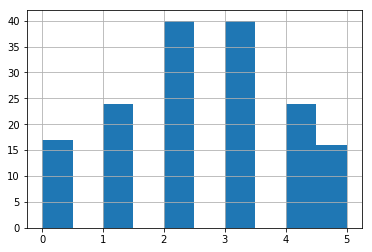

In [57]:
n_buckets = 6
buckets = [-np.inf, gdp_unique_df.quantile(0.1), gdp_unique_df.quantile(0.25),
           gdp_unique_df.quantile(0.5), gdp_unique_df.quantile(0.75), gdp_unique_df.quantile(0.9), np.inf]

cut = pd.cut(gdp_unique_df, buckets, labels=range(n_buckets))
cut.hist()

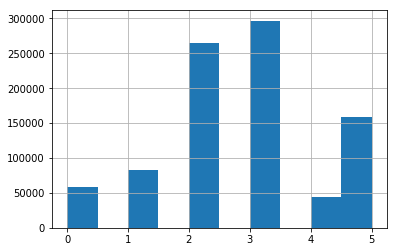

In [58]:
df_2000['cat_gdp'] = pd.cut(df_2000['log_GDP_pc'], buckets, labels=range(n_buckets))
df_2000['cat_gdp'].hist()
df_2000.to_csv(data_2000_path + 'normalized_2000_gdp_cat_new.csv')

## Re run everything with new categorical GDP

In [76]:
df_2000_new = pd.read_csv(data_2000_path + 'normalized_2000_gdp_cat_new.csv', index_col='pixel_id')
df_2000_new.head()

slope  Annual Mean Temperature  Mean Diurnal Range  \
pixel_id                                                          
1272549  -0.153686                -1.475497           -1.165186   
1276867  -0.044311                -1.450093           -1.237776   
1276868  -0.064612                -1.451896           -1.224768   
1298466  -0.029986                -1.373057           -1.550443   
1298467  -0.027755                -1.386652           -1.462573   

          Isothermality  Temperature Seasonality  \
pixel_id                                           
1272549       -1.144281                 0.809341   
1276867       -1.168411                 0.799235   
1276868       -1.167575                 0.812007   
1298466       -1.245204                 0.779111   
1298467       -1.218038                 0.766754   

          Max Temperature of Warmest Month  Min Temperature of Coldest Month  \
pixel_id                                                                       
1272549                          -1.712443                         -1.131726   
1276867                          -1.697998                         -1.119308   
1276868                          -1.682255                         -1.121053   
1298466                          -1.614412                         -0.995392   
1298467                          -1.639893                         -1.020766   

          Temperature Annual Range  Annual Precipitation  \
pixel_id                                                   
1272549                   0.526905             -0.529328   
1276867                   0.518887             -0.542167   
1276868                   0.529160             -0.552153   
1298466                   0.407722             -0.629187   
1298467                   0.426180             -0.619201   

          Precipitation of Wettest Month  ...  nutrient_availability_index  \
pixel_id                                  ...                                
1272549                        -0.764668  ...                     0.333333   
1276867                        -0.789142  ...                     0.333333   
1276868                        -0.780984  ...                     0.333333   
1298466                        -0.797301  ...                     0.333333   
1298467                        -0.789142  ...                     0.333333   

          oxygen_availability_index  workability_index  protected_areas_index  \
pixel_id                                                                        
1272549                    0.500000                0.0                    1.0   
1276867                    0.500000                0.0                    0.0   
1276868                    0.333333                0.0                    0.0   
1298466                    0.500000                0.0                    1.0   
1298467                    0.333333                0.0                    0.0   

          nutrient_retention_index  toxicity_index  excess_salts_index  \
pixel_id                                                                 
1272549                   0.166667             0.0                 0.0   
1276867                   0.166667             0.0                 0.0   
1276868                   0.333333             0.0                 0.0   
1298466                   0.166667             0.0                 0.0   
1298467                   0.166667             0.0                 0.0   

          rooting_conditions_index  log_calories_per_ha  cat_gdp  
pixel_id                                                          
1272549                        0.0            22.911327        4  
1276867                        0.0            22.911327        4  
1276868                        0.0            22.911327        4  
1298466                        0.0            22.911327        4  
1298467                        0.0            22.911327        4  

[5 rows x 33 columns]

In [80]:
df_2000_new['log_calories_per_ha'].describe()

count    906770.000000
mean         22.467157
std           0.631209
min          18.687235
25%          22.037706
50%          22.463908
75%          22.894216
max          24.307732
Name: log_calories_per_ha, dtype: float64

In [21]:
input_col2 = input_col.copy()
input_col2.remove('log_GDP_pc')
input_col2.append('cat_gdp')

### Computing

In [147]:
kmeans_2000_new, clustered_df = apply_kmeans(df_2000[input_col2], k)

Applying Kmeans for k=10


/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [148]:
clustered_df.to_csv(data_2000_path + 'clustered_2000_gdp_cat_new.csv')

In [155]:
for model in climate_models:
    print(model)
    for ssp in climate_scenarios:
        print(ssp)
        df = pd.read_csv(data_2050_gdp_cont_path + '{}_{}.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
        df['cat_gdp'] = pd.cut(df['log_GDP_pc'], buckets, labels=range(n_buckets))
        df.to_csv(data_2050_gdp_stat_path + '{}_{}_gdp_cat_new.csv'.format(model, ssp))

cc
ssp1
ssp2
ssp3
ssp4
ssp5
gs
ssp1
ssp2
ssp3
ssp4
ssp5
he
ssp1
ssp2
ssp3
ssp4
ssp5
mr
ssp1
ssp2
ssp3
ssp4
ssp5


In [156]:
# Clustering all the 2050 files 
non_numerical_col2 = non_numerical_col.copy()
non_numerical_col2.append('cat_gdp')

for model in climate_models:
    print('Clustering climate model {}:'.format(model))

    for ssp in climate_scenarios:
        print('{}:'.format(ssp))

        print('Loading dataframe')
        df = pd.read_csv(data_2050_gdp_stat_path + '{}_{}_gdp_cat_new.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])

        # To match columns of 2000 data
        df = df.drop(['lat', '%cropland', 'lon'], axis=1)

        # We need to divide these clumns by 10
        to_divide = ['Mean Diurnal Range', 'Temperature Annual Range', 
                     'Min Temperature of Coldest Month', 'Annual Mean Temperature',
                     'Max Temperature of Warmest Month', 'Temperature Seasonality']
        df[to_divide] = df[to_divide].apply(lambda r: r/10)

        print('Normalizing the columns')
        df = standardize_input(df, scaler, numerical_col, non_numerical_col2, std_non_num_col=False)

        print('Map the points to the 2000 clusters: k={}'.format(k))
        df = map_2000_clusters(df, input_col2, kmeans_2000_new, k)

        print('Saving the clustered file')
        df.to_csv(data_2050_gdp_stat_clustered_path + 'based2000_clustered_{}_{}_gdp_cat_new.csv'.format(model, ssp))

    print()

Clustering climate model cc:
ssp1:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp2:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp3:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp4:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp5:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file

Clustering climate model gs:
ssp1:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp2:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp3:
Loading dataframe
Normalizing the columns
Map the points to the 2000 clusters: k=10
Saving the clustered file
ssp4:
Loading

### Convex hull

In [187]:
min_max_new = compute_min_max(clustered_df[input_col2])

cc
ssp1


/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Checking percentage outside min-max 2000:
Outside: 0.75%
ssp2
Checking percentage outside min-max 2000:
Outside: 2.01%
ssp3
Checking percentage outside min-max 2000:
Outside: 1.30%
ssp4
Checking percentage outside min-max 2000:
Outside: 1.37%
ssp5
Checking percentage outside min-max 2000:
Outside: 2.12%
gs
ssp1
Checking percentage outside min-max 2000:
Outside: 0.65%
ssp2
Checking percentage outside min-max 2000:
Outside: 1.85%
ssp3
Checking percentage outside min-max 2000:
Outside: 1.34%
ssp4
Checking percentage outside min-max 2000:
Outside: 1.40%
ssp5
Checking percentage outside min-max 2000:
Outside: 1.72%
he
ssp1
Checking percentage outside min-max 2000:
Outside: 1.53%
ssp2
Checking percentage outside min-max 2000:
Outside: 3.19%
ssp3
Checking percentage outside min-max 2000:
Outside: 2.41%
ssp4
Checking percentage outside min-max 2000:
Outside: 2.39%
ssp5
Checking percentage outside min-max 2000:
Outside: 5.73%
mr
ssp1
Checking percentage outside min-max 2000:
Outside: 1.08%
ssp2

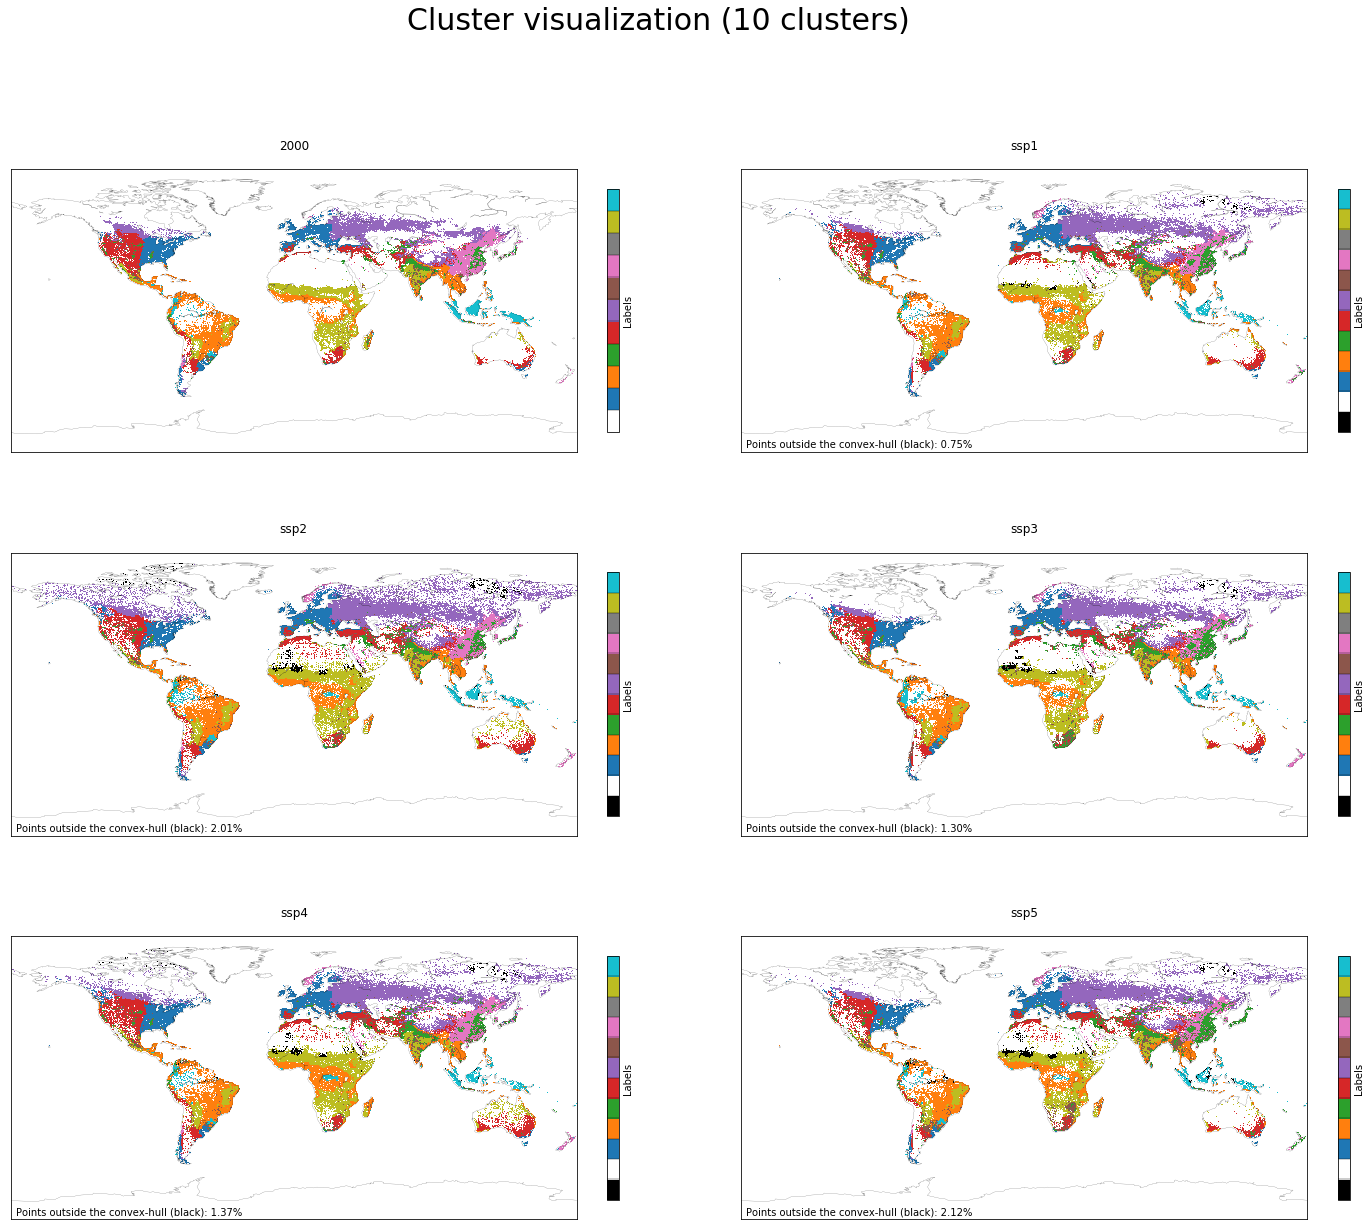

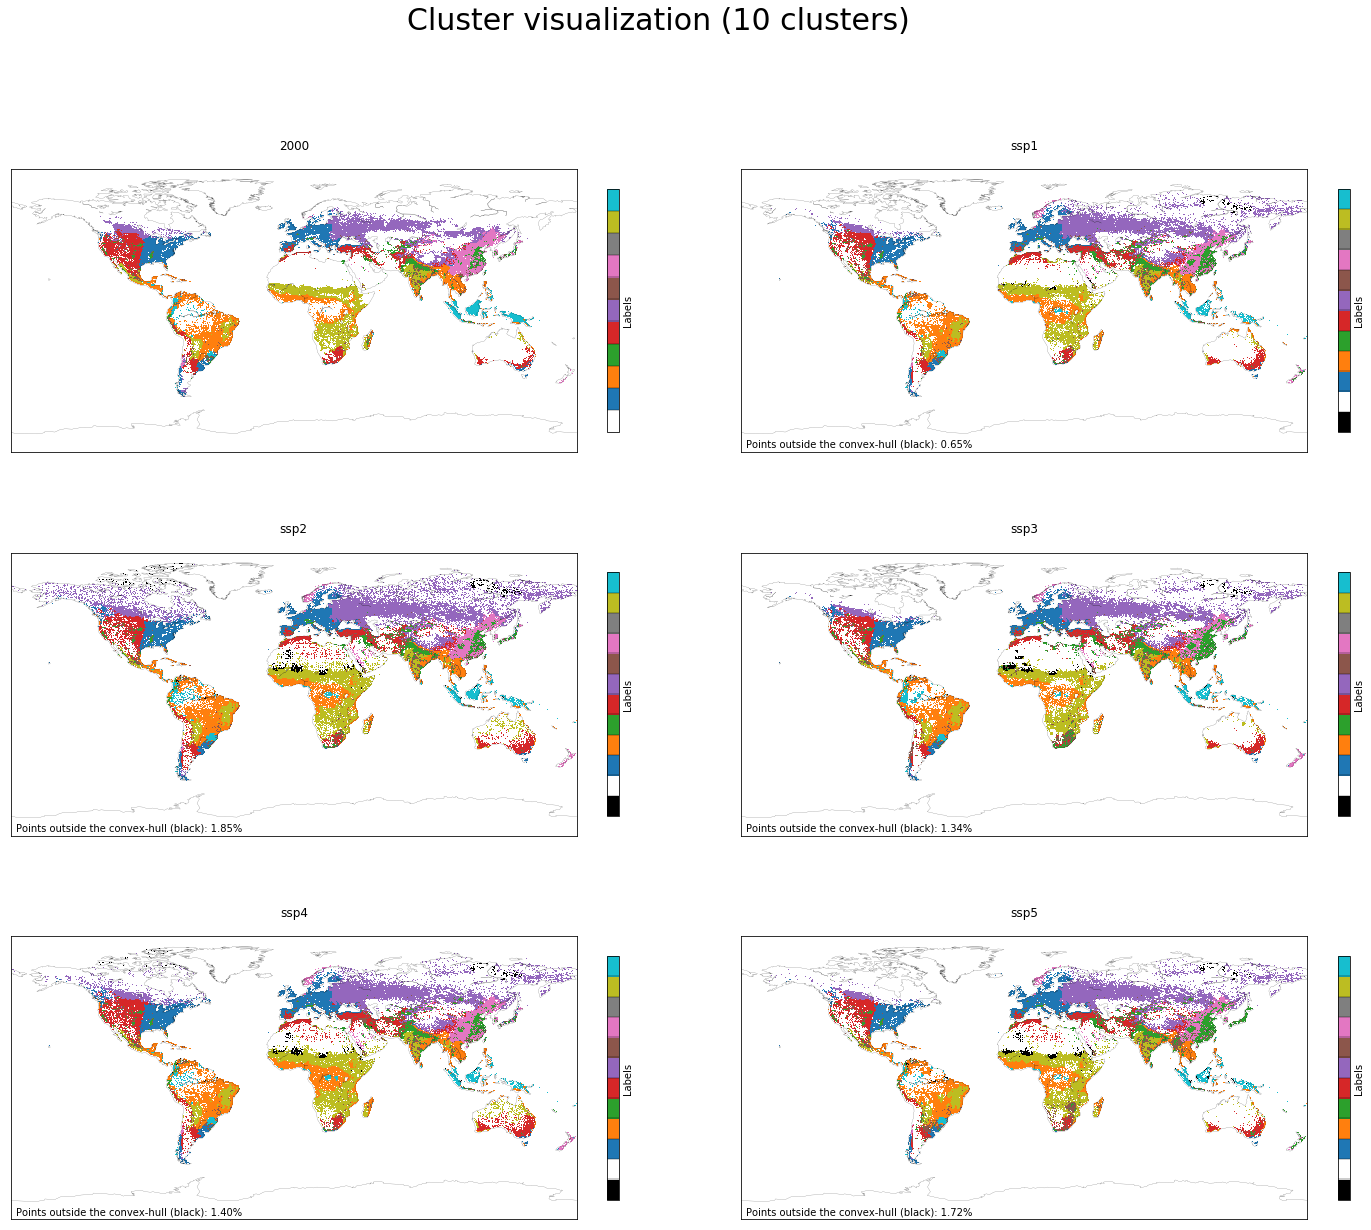

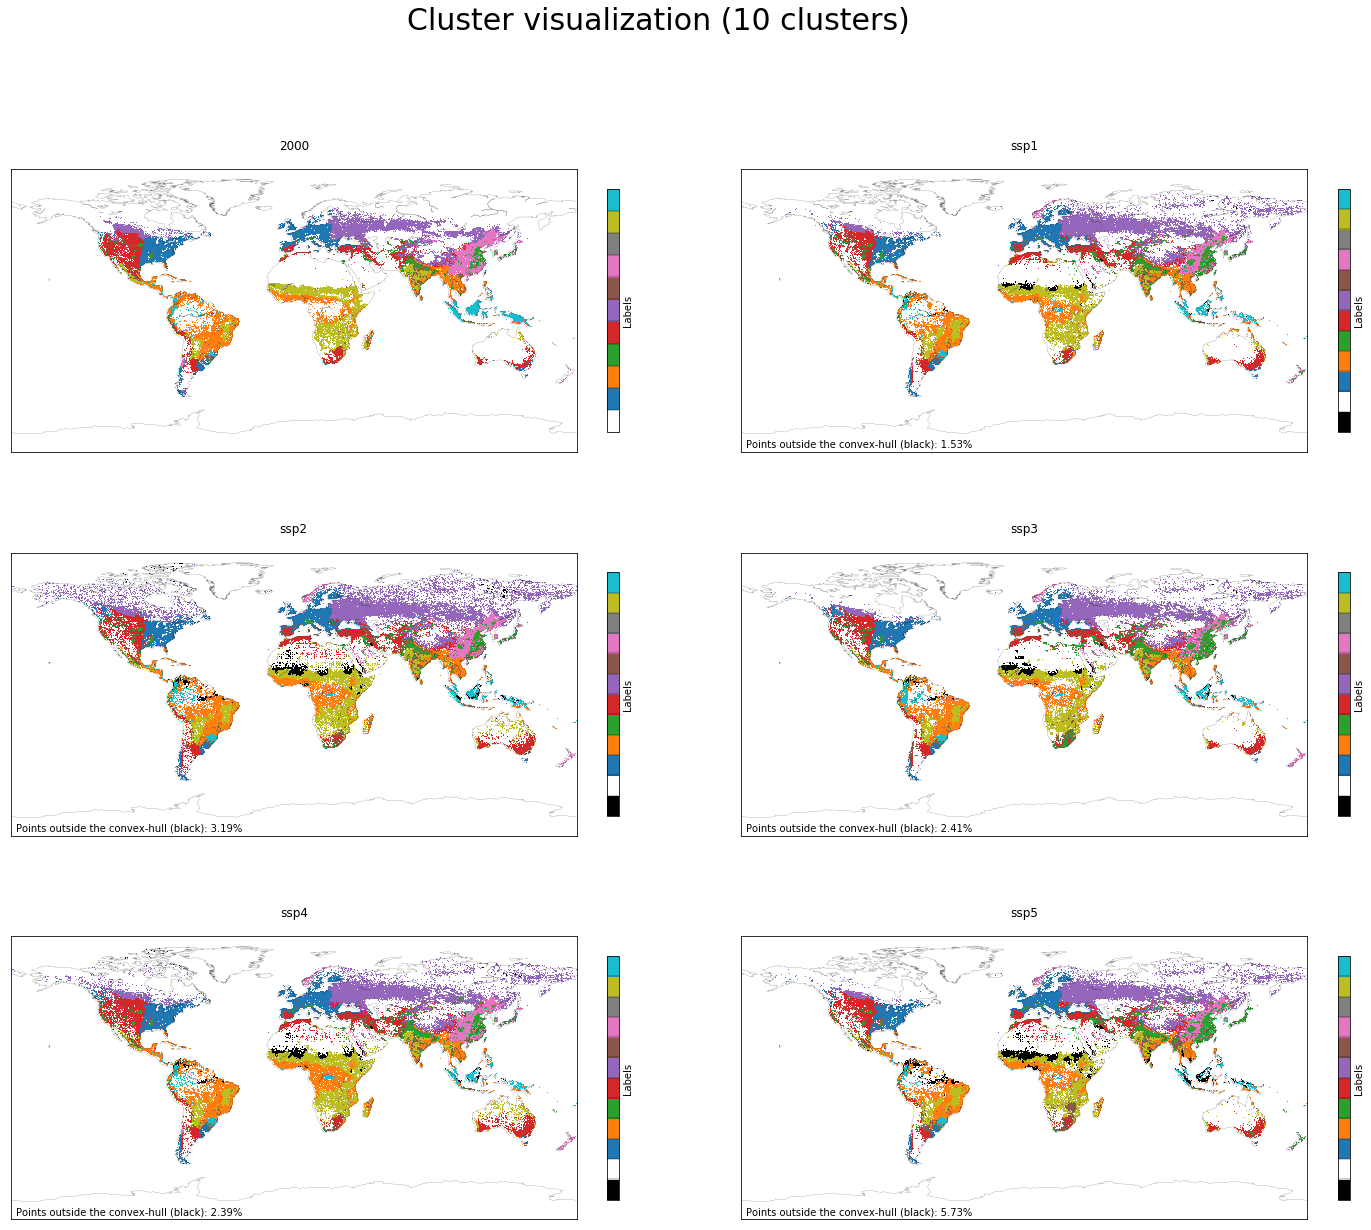

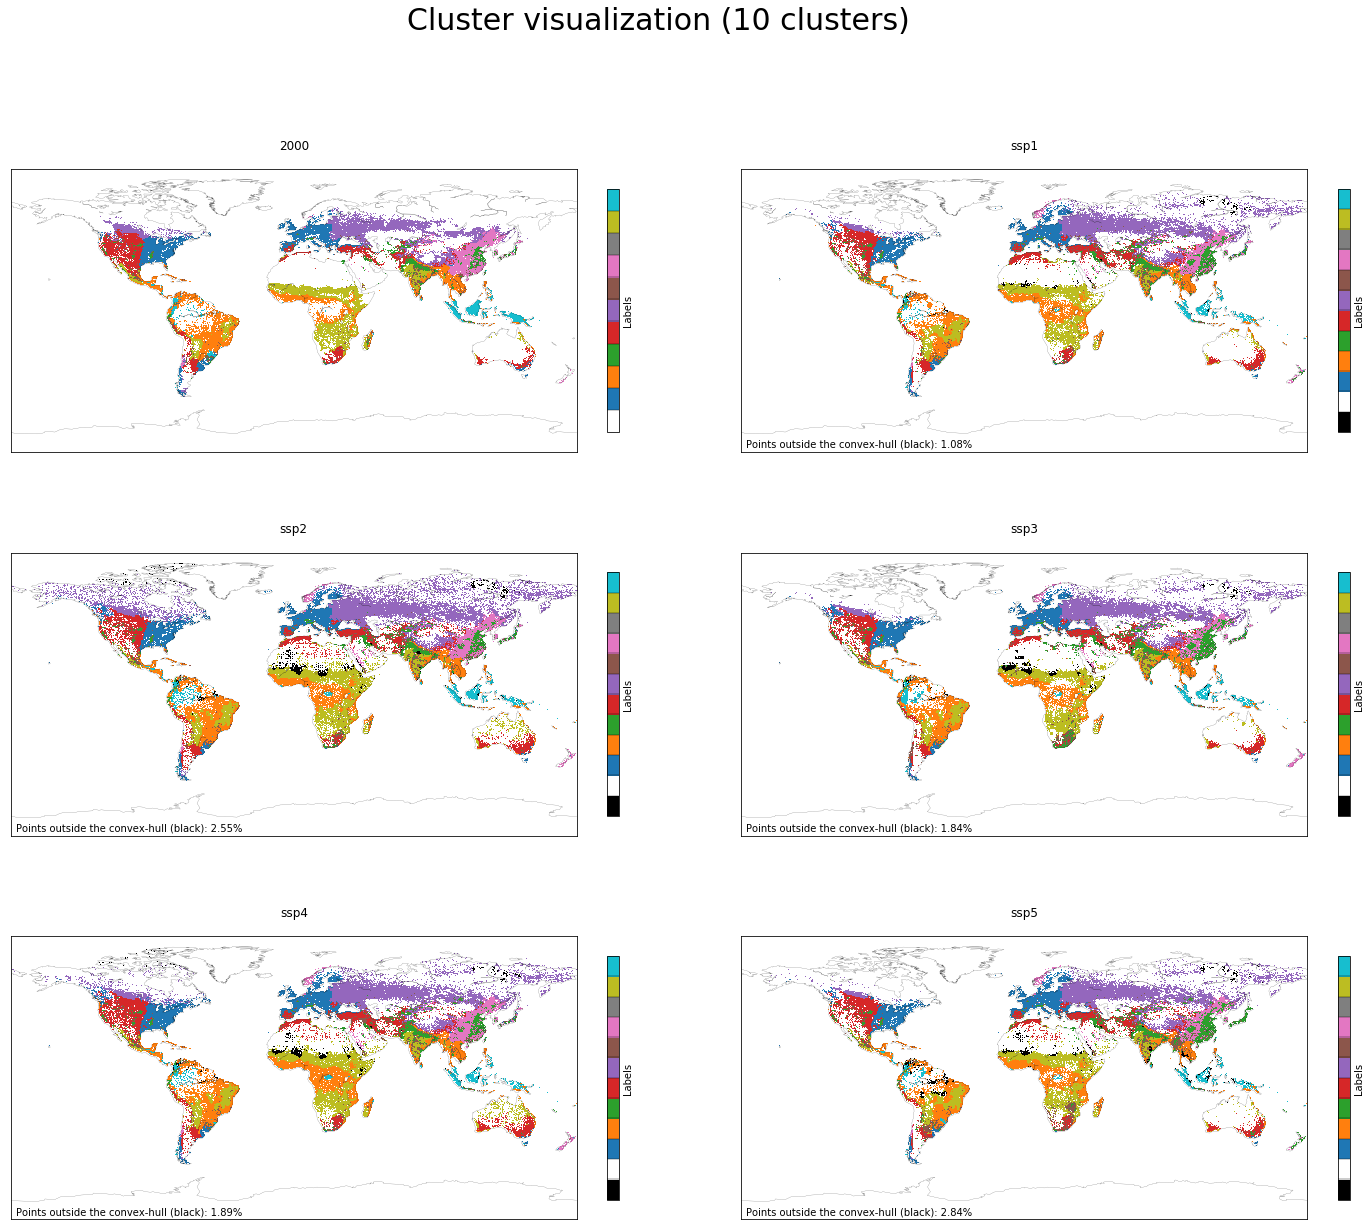

In [188]:
# Visualize the clusters for each climate scenario
for model in climate_models: 
    print(model)
    fig = plt.figure(figsize=(24, 20))
    fig.suptitle('Cluster visualization ({} clusters, {})'.format(k, model), fontsize=20)
    ax = plt.subplot(321)
    visualize_clusters(clustered_df['label_' + str(k)], fig, ax, '2000')
    
    for i, ssp in enumerate(climate_scenarios): 
        print(ssp)
        df = pd.read_csv(data_2050_gdp_stat_clustered_path + 'based2000_clustered_{}_{}_gdp_cat_new.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
        ax = plt.subplot(321 + i + 1)

        print('Checking percentage outside min-max 2000:')
        outside, prop_out = get_proportion_out_min_max(min_max_new, df[input_col2])
        print('Outside: {:.2f}%'.format(100*prop_out))

        visualize_clusters(df['label_' + str(k)], fig, ax, '{}'.format(ssp), outside=outside, savefig=True)
        ax.annotate('Points outside the convex-hull (black): {:.2f}%'.format(100*prop_out), xy=(5, 5), xycoords='axes points')
        
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    fig.savefig(cluster_fig_path + 'clusters/' + 'based2000clusters_map_{}_{}_gdp_cat'.format(model, k))

### Explain the clusters

In [62]:
input_col2 = input_col.copy()
input_col2.remove('log_GDP_pc')
input_col2.append('cat_gdp')

In [63]:
df_2000 = pd.read_csv(data_2000_path + 'clustered_2000_gdp_cat_new.csv', index_col='pixel_id')
df_2000.head()

nutrient_availability_index  oxygen_availability_index  \
pixel_id                                                           
1272549                      0.333333                   0.500000   
1276867                      0.333333                   0.500000   
1276868                      0.333333                   0.333333   
1298466                      0.333333                   0.500000   
1298467                      0.333333                   0.333333   

          workability_index  protected_areas_index  nutrient_retention_index  \
pixel_id                                                                       
1272549                 0.0                    1.0                  0.166667   
1276867                 0.0                    0.0                  0.166667   
1276868                 0.0                    0.0                  0.333333   
1298466                 0.0                    1.0                  0.166667   
1298467                 0.0                    0.0                  0.166667   

          toxicity_index  excess_salts_index  rooting_conditions_index  \
pixel_id                                                                 
1272549              0.0                 0.0                       0.0   
1276867              0.0                 0.0                       0.0   
1276868              0.0                 0.0                       0.0   
1298466              0.0                 0.0                       0.0   
1298467              0.0                 0.0                       0.0   

             slope  Annual Mean Temperature  ...  fertl_c3per  fertl_c4ann  \
pixel_id                                     ...                             
1272549  -0.153686                -1.475497  ...    -0.391367    -0.893066   
1276867  -0.044311                -1.450093  ...    -0.672494    -0.893066   
1276868  -0.064612                -1.451896  ...    -0.672494    -0.893066   
1298466  -0.029986                -1.373057  ...     0.170901    -0.893066   
1298467  -0.027755                -1.386652  ...     0.170901    -0.893066   

          log_altitude  irrig_c3ann  irrig_c3per  irrig_c3nfx  irrig_c4ann  \
pixel_id                                                                     
1272549      -1.196992    -0.408186    -0.408186    -0.408186    -0.408186   
1276867      -1.494671    -0.408186    -0.408186    -0.408186    -0.408186   
1276868      -1.510069    -0.408186    -0.408186    -0.408186    -0.408186   
1298466      -2.202117    -0.408186    -0.408186    -0.408186    -0.408186   
1298467      -1.912558    -0.408186    -0.408186    -0.408186    -0.408186   

          irrig_c4per  cat_gdp  label_10  
pixel_id                                  
1272549     -0.408186        4         4  
1276867     -0.408186        4         4  
1276868     -0.408186        4         4  
1298466     -0.408186        4         7  
1298467     -0.408186        4         7  

[5 rows x 32 columns]

In [64]:
df_2000.columns

Index(['nutrient_availability_index', 'oxygen_availability_index',
       'workability_index', 'protected_areas_index',
       'nutrient_retention_index', 'toxicity_index', 'excess_salts_index',
       'rooting_conditions_index', 'slope', 'Annual Mean Temperature',
       'Mean Diurnal Range', 'Isothermality', 'Temperature Seasonality',
       'Max Temperature of Warmest Month', 'Min Temperature of Coldest Month',
       'Temperature Annual Range', 'Annual Precipitation',
       'Precipitation of Wettest Month', 'Precipitation of Driest Month',
       'Precipitation Seasonality', 'fertl_c3ann', 'fertl_c3nfx',
       'fertl_c3per', 'fertl_c4ann', 'log_altitude', 'irrig_c3ann',
       'irrig_c3per', 'irrig_c3nfx', 'irrig_c4ann', 'irrig_c4per', 'cat_gdp',
       'label_10'],
      dtype='object')

In [12]:
"""df_2000['cat_gdp'] = df_2000['cat_gdp'] - df_2000['cat_gdp'].min()
df_2000['cat_gdp'] = df_2000['cat_gdp'] / df_2000['cat_gdp'].max()"""

"df_2000['cat_gdp'] = df_2000['cat_gdp'] - df_2000['cat_gdp'].min()\ndf_2000['cat_gdp'] = df_2000['cat_gdp'] / df_2000['cat_gdp'].max()"

In [65]:
input_col2

['nutrient_availability_index',
 'oxygen_availability_index',
 'workability_index',
 'protected_areas_index',
 'nutrient_retention_index',
 'toxicity_index',
 'excess_salts_index',
 'rooting_conditions_index',
 'slope',
 'Annual Mean Temperature',
 'Mean Diurnal Range',
 'Isothermality',
 'Temperature Seasonality',
 'Max Temperature of Warmest Month',
 'Min Temperature of Coldest Month',
 'Temperature Annual Range',
 'Annual Precipitation',
 'Precipitation of Wettest Month',
 'Precipitation of Driest Month',
 'Precipitation Seasonality',
 'fertl_c3ann',
 'fertl_c3nfx',
 'fertl_c3per',
 'fertl_c4ann',
 'log_altitude',
 'irrig_c3ann',
 'irrig_c3per',
 'irrig_c3nfx',
 'irrig_c4ann',
 'irrig_c4per',
 'cat_gdp']

In [14]:
"""k=10
kmeans_2000_new, df_2000 = apply_kmeans(df_2000[input_col2], k)"""

'k=10\nkmeans_2000_new, df_2000 = apply_kmeans(df_2000[input_col2], k)'

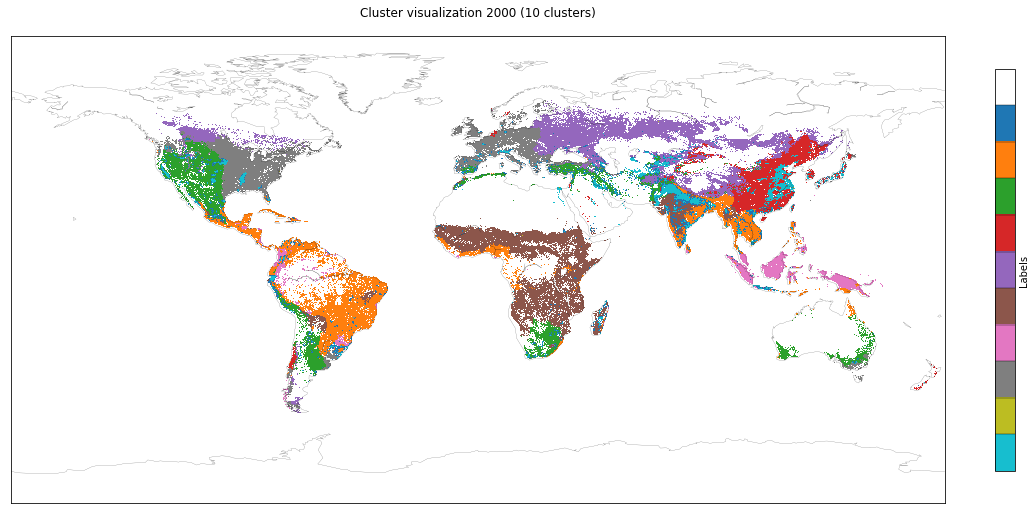

In [68]:
k=10
fig, ax = plt.subplots(figsize=(18, 12))
title = 'Cluster visualization 2000 ({} clusters)'.format(k)
visualize_clusters(df_2000['label_' + str(k)], fig, ax, title, savefig=False)

In [69]:
dev_by_lab_mean = df_2000.groupby('label_10').mean()
dev_by_lab_mean

nutrient_availability_index  oxygen_availability_index  \
label_10                                                           
0                            0.086439                   0.056291   
1                            0.222552                   0.053358   
2                            0.073594                   0.026185   
3                            0.099297                   0.031944   
4                            0.161867                   0.149188   
5                            0.152715                   0.055621   
6                            0.228190                   0.064775   
7                            0.116642                   0.053156   
8                            0.116667                   0.236508   
9                            0.082398                   0.083680   

          workability_index  protected_areas_index  nutrient_retention_index  \
label_10                                                                       
0                  0.132226               0.037306                  0.056496   
1                  0.105842               0.083344                  0.168241   
2                  0.120071               0.047329                  0.046692   
3                  0.068477               0.029439                  0.072083   
4                  0.157098               0.073596                  0.142227   
5                  0.136220               0.106444                  0.113906   
6                  0.079743               0.130209                  0.150834   
7                  0.080394               0.062386                  0.077352   
8                  0.041270               0.042857                  0.080159   
9                  0.060409               0.021608                  0.056074   

          toxicity_index  excess_salts_index  rooting_conditions_index  \
label_10                                                                 
0               0.019207            0.034568                  0.094056   
1               0.005690            0.012963                  0.082912   
2               0.024229            0.045249                  0.120681   
3               0.018698            0.026509                  0.079884   
4               0.102151            0.120423                  0.167173   
5               0.013695            0.029269                  0.087228   
6               0.005861            0.008031                  0.068291   
7               0.007721            0.013258                  0.080900   
8               0.014286            0.087302                  0.042063   
9               0.025169            0.070356                  0.053683   

              slope  Annual Mean Temperature  ...  fertl_c3nfx  fertl_c3per  \
label_10                                      ...                             
0         -0.070825                 0.381156  ...     0.165065     0.066051   
1          0.007848                 0.922143  ...    -0.219617    -0.230713   
2         -0.146142                -0.082925  ...    -0.333690    -0.104629   
3         -0.136879                -0.593136  ...     2.139444     2.424755   
4          0.015220                -1.356958  ...    -0.501292    -0.470206   
5         -0.003972                 0.959886  ...    -0.415128    -0.533512   
6         -0.036022                 0.954500  ...    -0.176014    -0.139061   
7         -0.034356                -0.534605  ...     0.228714     0.059969   
8         47.996798                 0.666611  ...     0.500077     0.286154   
9          0.501090                 0.334151  ...     1.005407     0.868342   

          fertl_c4ann  log_altitude  irrig_c3ann  irrig_c3per  irrig_c3nfx  \
label_10                                                                     
0            0.179221     -0.078241     1.764096     1.764096     1.764096   
1           -0.250658     -0.302419    -0.289750    -0.289750    -0.289750   
2            0.069996      0.598678    -0.261085    -0.261085    -0.261085   
3   

In [70]:
dev_by_lab_std = df_2000.groupby('label_10').std()
dev_by_lab_std

nutrient_availability_index  oxygen_availability_index  \
label_10                                                           
0                            0.134543                   0.124603   
1                            0.159466                   0.129498   
2                            0.127886                   0.089205   
3                            0.146437                   0.114434   
4                            0.262413                   0.277491   
5                            0.153834                   0.117606   
6                            0.142342                   0.148578   
7                            0.149360                   0.120727   
8                            0.156424                   0.186294   
9                            0.141129                   0.154580   

          workability_index  protected_areas_index  nutrient_retention_index  \
label_10                                                                       
0                  0.187906               0.180804                  0.111249   
1                  0.165442               0.258736                  0.142390   
2                  0.177660               0.201611                  0.109814   
3                  0.165097               0.135131                  0.127997   
4                  0.286350               0.239240                  0.262704   
5                  0.191282               0.298770                  0.142133   
6                  0.156366               0.327675                  0.118638   
7                  0.148428               0.233868                  0.117512   
8                  0.135980               0.184498                  0.126512   
9                  0.147674               0.135940                  0.126513   

          toxicity_index  excess_salts_index  rooting_conditions_index  \
label_10                                                                 
0               0.086882            0.113807                  0.170638   
1               0.066549            0.083911                  0.160719   
2               0.090448            0.116408                  0.180401   
3               0.103420            0.119087                  0.177402   
4               0.264655            0.268671                  0.292086   
5               0.079608            0.104859                  0.167856   
6               0.073294            0.077806                  0.153393   
7               0.070353            0.079767                  0.155372   
8               0.089639            0.168799                  0.117356   
9               0.108254            0.155010                  0.136819   

             slope  Annual Mean Temperature  ...  fertl_c3nfx  fertl_c3per  \
label_10                                     ...                             
0         0.576217                 0.720688  ...     0.791585     0.761410   
1         0.769947                 0.328680  ...     0.587597     0.460969   
2         0.298471                 0.561858  ...     0.440141     0.792320   
3         0.468901                 0.692164  ...     1.184906     0.950048   
4         0.652607                 0.460549  ...     0.365092     0.269943   
5         0.632089                 0.356088  ...     0.442784     0.182644   
6         0.669245                 0.442229  ...     0.462931     0.420864   
7         0.545717                 0.469567  ...     0.821762     0.823641   
8         0.000000                 0.821856  ...     1.197362     1.281312   
9         1.459999                 0.657696  ...     1.586323     1.364061   

          fertl_c4ann  log_altitude  irrig_c3ann  irrig_c3per  irrig_c3nfx  \
label_10                                                                     
0            0.891487      1.101886     0.601269     0.601269     0.601269   
1            0.407670      0.930732     0.290078     0.290078     0.290078   
2            0.870378      0.758678     0.324542     0.324542     0.324542   
3            0.9

In [71]:
explain_clusters = pd.DataFrame()

for label, row in dev_by_lab_std.iterrows():
    n = 5
    smallest_std = row.nsmallest(n)
    associated_means = dev_by_lab_mean.loc[label, smallest_std.index]
    new_df = pd.DataFrame({'std': smallest_std.values, 'mean': associated_means.values}, index=[[label]*n, list(smallest_std.index)], columns=['std', 'mean'])
    explain_clusters = explain_clusters.append(new_df)   

explain_clusters

std       mean
0 toxicity_index               0.086882   0.019207
  nutrient_retention_index     0.111249   0.056496
  excess_salts_index           0.113807   0.034568
  oxygen_availability_index    0.124603   0.056291
  nutrient_availability_index  0.134543   0.086439
1 toxicity_index               0.066549   0.005690
  excess_salts_index           0.083911   0.012963
  oxygen_availability_index    0.129498   0.053358
  nutrient_retention_index     0.142390   0.168241
  nutrient_availability_index  0.159466   0.222552
2 oxygen_availability_index    0.089205   0.026185
  toxicity_index               0.090448   0.024229
  nutrient_retention_index     0.109814   0.046692
  excess_salts_index           0.116408   0.045249
  nutrient_availability_index  0.127886   0.073594
3 toxicity_index               0.103420   0.018698
  oxygen_availability_index    0.114434   0.031944
  excess_salts_index           0.119087   0.026509
  nutrient_retention_index     0.127997   0.072083
  protected_areas_index        0.135131   0.029439
4 irrig_c3ann                  0.210439  -0.358983
  irrig_c3per                  0.210439  -0.358983
  irrig_c3nfx                  0.210439  -0.358983
  irrig_c4ann                  0.210439  -0.358983
  irrig_c4per                  0.210439  -0.358983
5 toxicity_index               0.079608   0.013695
  excess_salts_index           0.104859   0.029269
  oxygen_availability_index    0.117606   0.055621
  nutrient_retention_index     0.142133   0.113906
  nutrient_availability_index  0.153834   0.152715
6 toxicity_index               0.073294   0.005861
  excess_salts_index           0.077806   0.008031
  nutrient_retention_index     0.118638   0.150834
  nutrient_availability_index  0.142342   0.228190
  oxygen_availability_index    0.148578   0.064775
7 toxicity_index               0.070353   0.007721
  excess_salts_index           0.079767   0.013258
  nutrient_retention_index     0.117512   0.077352
  oxygen_availability_index    0.120727   0.053156
  workability_index            0.148428   0.080394
8 slope                        0.000000  47.996798
  toxicity_index               0.089639   0.014286
  rooting_conditions_index     0.117356   0.042063
  nutrient_retention_index     0.126512   0.080159
  workability_index            0.135980   0.041270
9 toxicity_index               0.108254   0.025169
  nutrient_retention_index     0.126513   0.056074
  protected_areas_index        0.135940   0.021608
  rooting_conditions_index     0.136819   0.053683
  nutrient_availability_index  0.141129   0.082398

In [72]:
to_keep = ['Annual Mean Temperature',
           'Mean Diurnal Range', 'Isothermality', 'Temperature Seasonality',
           'Max Temperature of Warmest Month', 'Min Temperature of Coldest Month',
           'Temperature Annual Range', 'Annual Precipitation',
           'Precipitation of Wettest Month', 'Precipitation of Driest Month',
           'Precipitation Seasonality', 'cat_gdp']

explain_clusters_new = pd.DataFrame()

for label, row in dev_by_lab_std[to_keep].iterrows():
    n = len(row)
    smallest_std = row.nsmallest(n)
    associated_means = dev_by_lab_mean.loc[label, smallest_std.index]
    new_df = pd.DataFrame({'std': smallest_std.values, 'mean': associated_means.values}, index=[[label]*n, list(smallest_std.index)], columns=['std', 'mean'])
    explain_clusters_new = explain_clusters_new.append(new_df)   

In [73]:
lab = 0
explain_clusters_new.loc[lab, :]

std      mean
Precipitation of Driest Month     0.682008 -0.213013
Min Temperature of Coldest Month  0.706872  0.300472
Annual Mean Temperature           0.720688  0.381156
Temperature Seasonality           0.727083 -0.169737
Isothermality                     0.770185  0.067537
Temperature Annual Range          0.812205 -0.122470
Annual Precipitation              0.840530 -0.105822
Max Temperature of Warmest Month  0.909944  0.488509
Precipitation Seasonality         1.002575  0.249727
Precipitation of Wettest Month    1.011414  0.052419
Mean Diurnal Range                1.021843  0.214437
cat_gdp                           1.158173  2.701886

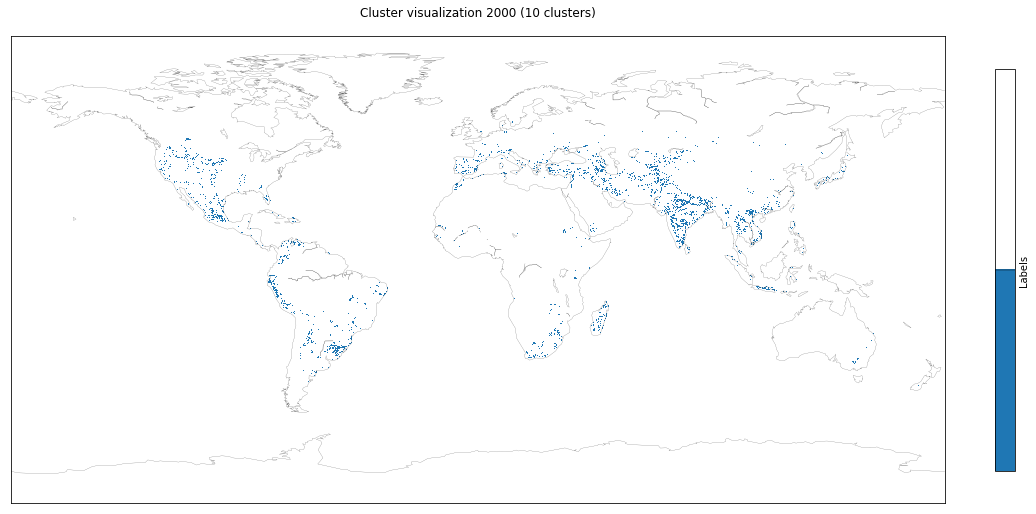

In [21]:
k = 10
fig, ax = plt.subplots(figsize=(18, 12))
title = 'Cluster visualization 2000 ({} clusters)'.format(k)
visualize_clusters(df_2000[df_2000['label_' + str(k)] == lab]['label_' + str(k)], fig, ax, title, savefig=False)

In [74]:
labels_exp = ['Outliers',
              'High temperatures all year long',
              'Changing temperatures (seasons),\nLow precipitation',
              'Average GDP,\nColder than average',
              'Mostly cold (except few days a year),\nLow precipitations',
              'Low GDP\nHigh temperatures',
              'High temperatures,\nHigh precipitations',
              'High GDP,\nDistinct seasons',
              'Really steep ground\n(only 210 points)',
              'Cool temperatures,\nLow precipitations']

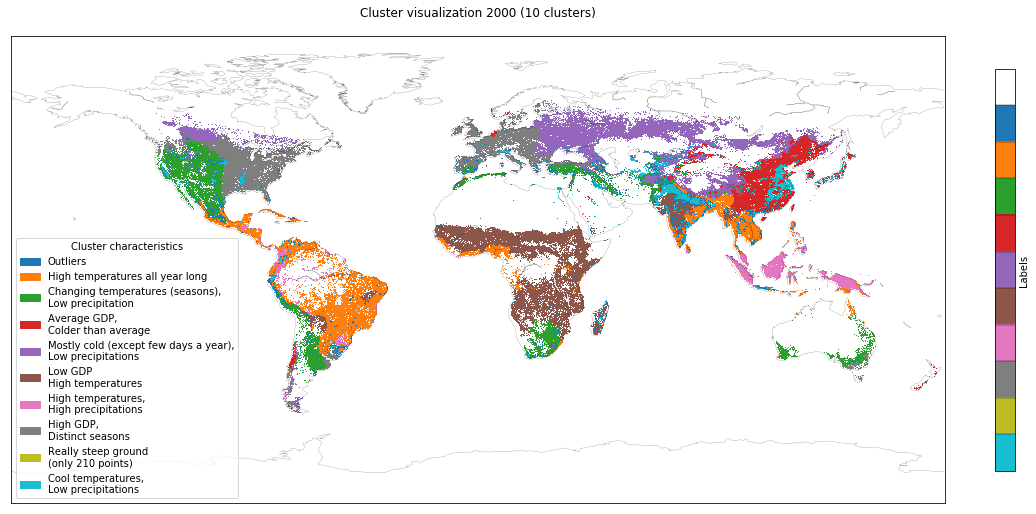

In [75]:
k=10
fig, ax = plt.subplots(figsize=(18, 12))
title = 'Cluster visualization 2000 ({} clusters)'.format(k)
visualize_clusters(df_2000['label_' + str(k)], fig, ax, title, explain=labels_exp, savefig=False)
plt.savefig(cluster_fig_path + 'clusters_explained_2000.png', dpi=500)